### Individual household electric power consumption data: Exploratory Analysis    
**_Ripunjoy Gohain_**       
ripunjoygohain79@gmail.com

**Data Information:**     
1. date: Date in format dd/mm/yyyy    
2. time: time in format hh:mm:ss    
3. global_active_power: household global minute-averaged active power (in kilowatt)    
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)    
5. voltage: minute-averaged voltage (in volt)    
6. global_intensity: household global minute-averaged current intensity (in ampere)    
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).     
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.    
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.    

[click here to redirect to the url:](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [1]:
# coding: utf-8
# !/usr/bin/env python3
import sys
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:4f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
print("Python Version: ", sys.version)
print("Pandas Version: ", pd.__version__)
print("Numpy Version: ", np.__version__)
print("Seaborn Version: ", sns.__version__)

Python Version:  3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]
Pandas Version:  0.23.3
Numpy Version:  1.16.4
Seaborn Version:  0.9.0


In [3]:
# dataset is txt form, deliminated with ";", reading the dataset variables as string so setting the low_memory to false
df = pd.read_csv("./data/household_power_consumption.zip", compression="zip", sep=";", low_memory=False, header=0, 
                 infer_datetime_format=True, parse_dates={"local_time": [0, 1]}, index_col=["local_time"])

In [4]:
# converting the column headers to small letters
df.columns = [x.lower() for x in df.columns]
# missing values are represented as "?"
df.replace(to_replace="?", value=np.nan, inplace=True)
# convert all values to float32
df = df.astype(np.float32)

In [5]:
df.head(10)

global_active_power  global_reactive_power    voltage  \
local_time                                                                   
2006-12-16 17:24:00             4.216000               0.418000 234.839996   
2006-12-16 17:25:00             5.360000               0.436000 233.630005   
2006-12-16 17:26:00             5.374000               0.498000 233.289993   
2006-12-16 17:27:00             5.388000               0.502000 233.740005   
2006-12-16 17:28:00             3.666000               0.528000 235.679993   
2006-12-16 17:29:00             3.520000               0.522000 235.020004   
2006-12-16 17:30:00             3.702000               0.520000 235.089996   
2006-12-16 17:31:00             3.700000               0.520000 235.220001   
2006-12-16 17:32:00             3.668000               0.510000 233.990005   
2006-12-16 17:33:00             3.662000               0.510000 233.860001   

                     global_intensity  sub_metering_1  sub_metering_2  \
local_time                                                              
2006-12-16 17:24:00         18.400000        0.000000        1.000000   
2006-12-16 17:25:00         23.000000        0.000000        1.000000   
2006-12-16 17:26:00         23.000000        0.000000        2.000000   
2006-12-16 17:27:00         23.000000        0.000000        1.000000   
2006-12-16 17:28:00         15.800000        0.000000        1.000000   
2006-12-16 17:29:00         15.000000        0.000000        2.000000   
2006-12-16 17:30:00         15.800000        0.000000        1.000000   
2006-12-16 17:31:00         15.800000        0.000000        1.000000   
2006-12-16 17:32:00         15.800000        0.000000        1.000000   
2006-12-16 17:33:00         15.800000        0.000000        2.000000   

                     sub_metering_3  
local_time                           
2006-12-16 17:24:00       17.000000  
2006-12-16 17:25:00       16.000000  
2006-12-16 17:26:00       17.000000  
2006-12-16 17:27:00       17.000000  
2006-12-16 17:28:00       17.000000  
2006-12-16 17:29:00       17.000000  
2006-12-16 17:30:00       17.000000  
2006-12-16 17:31:00       17.000000  
2006-12-16 17:32:00       17.000000  
2006-12-16 17:33:00       16.000000

In [6]:
print("Shape of the data frame: ", df.shape)

Shape of the data frame:  (2075259, 7)


In [7]:
# Calculating expected number of index for 1 minutes frequency in the provided time period
print("Expected number of index(data) in the time range: {:.0f}".format((df.index.max()-df.index.min()).total_seconds() / (60) + 1))

Expected number of index(data) in the time range: 2075259


### Shape and expected index matching, so there can be missing values but no missing index

In [8]:
print("Data start time: ", df.index.min())
print("Data end time: ", df.index.max())
print("Total time period: ", df.index.max()-df.index.min())

Data start time:  2006-12-16 17:24:00
Data end time:  2010-11-26 21:02:00
Total time period:  1441 days 03:38:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
global_active_power      float32
global_reactive_power    float32
voltage                  float32
global_intensity         float32
sub_metering_1           float32
sub_metering_2           float32
sub_metering_3           float32
dtypes: float32(7)
memory usage: 71.2 MB


In [10]:
df.describe()

global_active_power  global_reactive_power        voltage  \
count       2049280.000000         2049280.000000 2049280.000000   
mean              1.091615               0.123714     240.839859   
std               1.057294               0.112722       3.239987   
min               0.076000               0.000000     223.199997   
25%               0.308000               0.048000     238.990005   
50%               0.602000               0.100000     241.009995   
75%               1.528000               0.194000     242.889999   
max              11.122000               1.390000     254.149994   

       global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
count    2049280.000000  2049280.000000  2049280.000000  2049280.000000  
mean           4.627760        1.121923        1.298520        6.458447  
std            4.444396        6.153031        5.822026        8.437154  
min            0.200000        0.000000        0.000000        0.000000  
25%            1.400000        0.000000        0.000000        0.000000  
50%            2.600000        0.000000        0.000000        1.000000  
75%            6.400000        0.000000        1.000000       17.000000  
max           48.400002       88.000000       80.000000       31.000000

In [11]:
# Missing value statistics
print("Column wise missing values: ")
df.isna().sum()

Column wise missing values: 


global_active_power      25979
global_reactive_power    25979
voltage                  25979
global_intensity         25979
sub_metering_1           25979
sub_metering_2           25979
sub_metering_3           25979
dtype: int64

In [12]:
# If we drop row if all of the values are missing then remaining shape will be: Just calculating, not assigning to the dataframe
df.dropna(axis=0, how="all").shape

(2049280, 7)

In [13]:
# Let's check if this difference of dropping any is matching indidividual missing value count or not
df.shape[0] - df.dropna(axis=0, how="any").shape[0]

25979

In [14]:
# From above, as it's matching we can say that, if there if one tag is missing, then all other tags are missing, missing value
# is may not from some specific sensor but feels like communication erro5
print("Missing values percentage: {:.2f} %".format((df.shape[0] - df.dropna(axis=0, how="any").shape[0]) * 100 / df.shape[0]))

Missing values percentage: 1.25 %


In [15]:
# let's check if missing values are from random timestamps or it occurs for longer time interval
missing_stat = df.dropna().index.to_series().diff().dropna().dt.total_seconds().div(60)

In [16]:
# Here actually we are calculating time difference, so diff 1 minutes means no missing value
# 2 means, 1 missing value before some particular time stamp, slly 10 means 9 missing values before that particular time
missing_stat.describe()

count   2049279.000000
mean          1.012677
std           7.624718
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        7227.000000
Name: local_time, dtype: float64

In [17]:
print("Count of missing timestamps instances: ", missing_stat[missing_stat >= 2].shape)
missing_stat[missing_stat >= 2].sort_values(ascending=False).head(10)

Count of missing timestamps instances:  (71,)


local_time
2010-08-22 21:28:00   7227.000000
2010-09-28 19:13:00   5238.000000
2007-04-30 14:24:00   3724.000000
2009-06-15 07:35:00   3306.000000
2010-01-14 19:02:00   3130.000000
2010-03-21 13:39:00   2028.000000
2009-08-13 19:51:00    892.000000
2007-07-15 18:12:00     84.000000
2008-12-10 11:58:00     71.000000
2007-07-15 19:08:00     48.000000
Name: local_time, dtype: float64

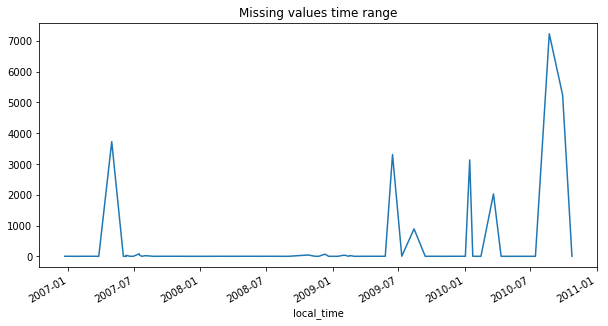

In [18]:
missing_stat[missing_stat >= 2].plot(figsize=(10,5), title="Missing values time range");

In [19]:
print("Consecutive missing values can go upto: {:.2f} days".format((missing_stat.max() - 1) / (60*24)))

Consecutive missing values can go upto: 5.02 days


### Ways to fill missing values
1. When missing values are coming for few minutes (say 10, 20 minutes), Linearly interpolating the values will make sense as we don't expect very drastic change in over few minutes.
2. When it is in hours, we might need to look for previous few days that particular time as well as nearby times can come up with an strategy.
3. In our case it is going for days (5 days). It is little difficult to fill those values, anything can happen in those 5 days. Strategies can be followed such:
    1. Looks for that particular weekday and time in last 30-60 days and fill the values with aggregated values from lookup time horizon.
    2. As we have multiple years data, look for those particular date time over years (might not work much well, year to year this can change, when houshold buys new devices expectations are that consumptions will change).
4. We can't apply methods like filling missing values by looking on the other values and trying to fit some models (say knn, regression) here. Because when 1 parameter is missing, other parameters are also missing.

**Due to time constraints, I am not going to experiment with these methods. We need to create a fuzzy logic based on the period of missing values**
_To keep it simple, I will try to just fill the values by looking previous days same time power consumption. For longer time periods (like 5 days), It will just repeat for all the days. Basically the data will be filled up with last available time stamps data_

In [20]:
def fill_missing_values_simple(dataFrame):
    """
    Input: dataFrame
    Simple approach to fill missing values
    If today some value is missing, look for yesterdays same time data and fill it up with that
    Output: dataFrame
    """
    one_day_minutes = 60 * 24
    for row in range(dataFrame.values.shape[0]):
        for col in range(dataFrame.values.shape[1]):
            if np.isnan(dataFrame.values[row, col]):
                dataFrame.values[row, col] = dataFrame.values[row - one_day_minutes, col]
    return dataFrame

In [21]:
df = fill_missing_values_simple(dataFrame=df)

In [22]:
df.shape

(2075259, 7)

In [23]:
# Verify if missing values are being filled
df.isna().sum()

global_active_power      0
global_reactive_power    0
voltage                  0
global_intensity         0
sub_metering_1           0
sub_metering_2           0
sub_metering_3           0
dtype: int64

In [24]:
df.head()

global_active_power  global_reactive_power    voltage  \
local_time                                                                   
2006-12-16 17:24:00             4.216000               0.418000 234.839996   
2006-12-16 17:25:00             5.360000               0.436000 233.630005   
2006-12-16 17:26:00             5.374000               0.498000 233.289993   
2006-12-16 17:27:00             5.388000               0.502000 233.740005   
2006-12-16 17:28:00             3.666000               0.528000 235.679993   

                     global_intensity  sub_metering_1  sub_metering_2  \
local_time                                                              
2006-12-16 17:24:00         18.400000        0.000000        1.000000   
2006-12-16 17:25:00         23.000000        0.000000        1.000000   
2006-12-16 17:26:00         23.000000        0.000000        2.000000   
2006-12-16 17:27:00         23.000000        0.000000        1.000000   
2006-12-16 17:28:00         15.800000        0.000000        1.000000   

                     sub_metering_3  
local_time                           
2006-12-16 17:24:00       17.000000  
2006-12-16 17:25:00       16.000000  
2006-12-16 17:26:00       17.000000  
2006-12-16 17:27:00       17.000000  
2006-12-16 17:28:00       17.000000

In [25]:
[x for x in df.columns if "metering" in x]

['sub_metering_1', 'sub_metering_2', 'sub_metering_3']

In [26]:
# global_active_power is in kw, sub metering is in wH
# We will get other part energy being consumed by converting global_active_power to energy and subtracting all other sub metering energy
df['sub_metering_other'] = (df.global_active_power * 1000 / 60) - (df[[x for x in df.columns if "metering" in x]].sum(axis=1))

In [27]:
df.sub_metering_other.describe()

count   2075259.000000
mean          9.298722
std           9.561277
min          -2.400000
25%           3.800000
50%           5.500000
75%          10.366667
max         124.833328
Name: sub_metering_other, dtype: float64

In [28]:
df[df.sub_metering_other<0].shape

(1059, 8)

### Above observation is an interesting observation
We expected that global_active_power (converted to energy) should be equal or lesser than all 3 energy meters combined readings.
But here the negative values indicating that which is not true. And this is very unlikely. Though 1K records out of 2 million records is very less, we may be able to treat this as outliers or further extend the analysis to understand this. It may be because of fauly sensor readings.     
**For the time being, we will change this negative value to ZERO**     
_If time permits, we will try to understand this particular scenario in detail._

In [29]:
df.loc[df.sub_metering_other<0, "sub_metering_other"] = 0

In [30]:
df.describe()

global_active_power  global_reactive_power        voltage  \
count       2075259.000000         2075259.000000 2075259.000000   
mean              1.089417               0.123687     240.836441   
std               1.054678               0.112593       3.240051   
min               0.076000               0.000000     223.199997   
25%               0.308000               0.048000     238.990005   
50%               0.602000               0.100000     241.000000   
75%               1.526000               0.194000     242.869995   
max              11.122000               1.390000     254.149994   

       global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  \
count    2075259.000000  2075259.000000  2075259.000000  2075259.000000   
mean           4.618402        1.118474        1.291131        6.448635   
std            4.433165        6.141460        5.796922        8.433584   
min            0.200000        0.000000        0.000000        0.000000   
25%            1.400000        0.000000        0.000000        0.000000   
50%            2.600000        0.000000        0.000000        1.000000   
75%            6.400000        0.000000        1.000000       17.000000   
max           48.400002       88.000000       80.000000       31.000000   

       sub_metering_other  
count      2075259.000000  
mean             9.298876  
std              9.561122  
min              0.000000  
25%              3.800000  
50%              5.500000  
75%             10.366667  
max            124.833328

In [31]:
# Saving the dataframe for later use
df.to_csv("./data/cleaned_household_power_consumption.csv")

## Plotting

In [32]:
# Getting 
df["year"] = df.index.year
df["quarter"] = df.index.quarter
df["month"] = df.index.month
df["day"] = df.index.day
# Monday 0, Sunday 6
df["weekday"]=df.index.weekday
df["weekday"] = (df["weekday"] < 5).astype(int)

### Univariate distribution of observations

In [33]:
cols = ["global_active_power", "global_reactive_power", "voltage", "global_intensity", "sub_metering_1", "sub_metering_2",
             "sub_metering_3", "sub_metering_other"]

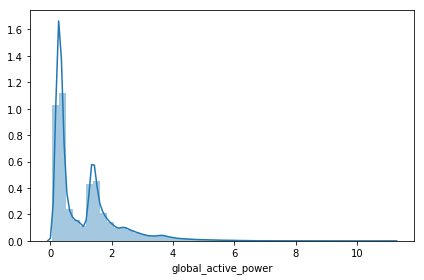

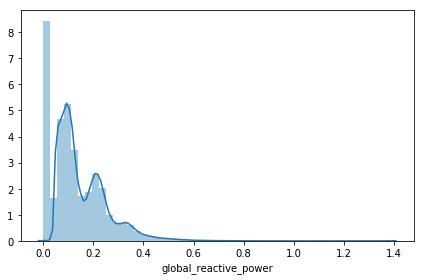

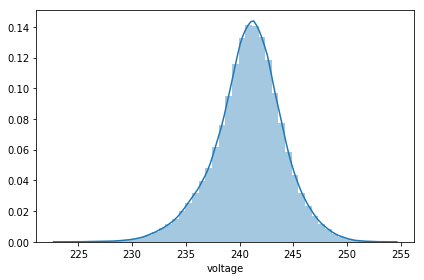

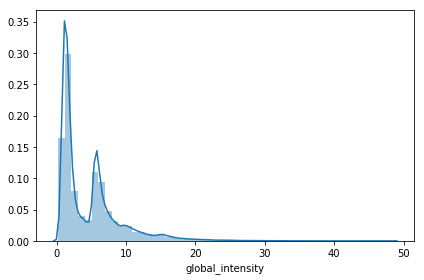

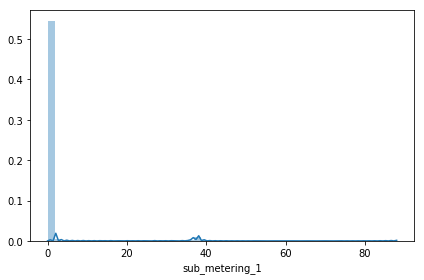

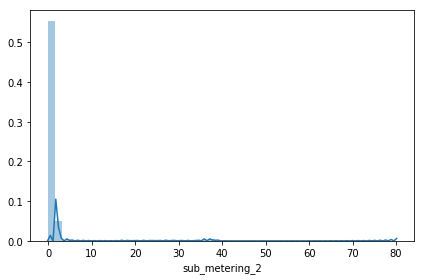

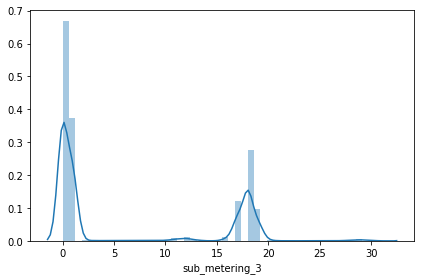

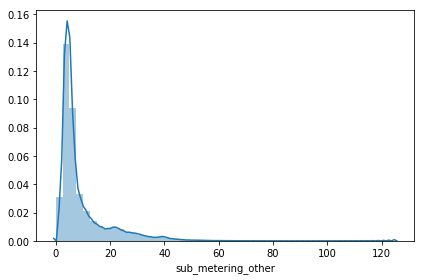

In [34]:
for col in cols:
    sns.distplot(df[col])
    plt.tight_layout()
    plt.savefig("./plots/" + "distribution_" + col + ".png")
    plt.show()

### Normality check of the data
**KURTOSIS: describes heaviness of the tails of data distribution**     
Normal Distribution has a kurtosis of close to 0. If the kurtosis is greater than zero, then distribution has heavier tails. If the kurtosis is less than zero, then the distribution is light tails.

**SKEWNESS: describes the symmetry of the data distribution**    
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [35]:
for col in cols:
    print("\n*** Normality Test for: {} ***".format(col))
    print("--"*30)
    stat, p = stats.normaltest(df[col])
    print("Statistics(z-score for kurtosis & skewness): {:.3f}, pvalue: {:.3f}".format(stat, p))
    alpha = 0.05
    if p > alpha:
        print("{} data looks Normal: (fail to reject H0)".format(col))
    else:
        print("{} data doesn't looks Normal: (reject H0)".format(col))
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df[col])))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df[col])))


*** Normality Test for: global_active_power ***
------------------------------------------------------------
Statistics(z-score for kurtosis & skewness): 735736.314, pvalue: 0.000
global_active_power data doesn't looks Normal: (reject H0)
Kurtosis of normal distribution: 4.237163146889262
Skewness of normal distribution: 1.7888684272766113

*** Normality Test for: global_reactive_power ***
------------------------------------------------------------
Statistics(z-score for kurtosis & skewness): 469881.826, pvalue: 0.000
global_reactive_power data doesn't looks Normal: (reject H0)
Kurtosis of normal distribution: 2.604342332197005
Skewness of normal distribution: 1.2613612413406372

*** Normality Test for: voltage ***
------------------------------------------------------------
Statistics(z-score for kurtosis & skewness): 59673.853, pvalue: 0.000
voltage data doesn't looks Normal: (reject H0)
Kurtosis of normal distribution: 0.7281677355943388
Skewness of normal distribution: -0.3231960

## Time Series Plots:

**In the next Notebook interactive plots being created using bokeh so that we can drill down(Note: In GitHub we will get the source code, but not the plots. It needs a server or needs to run in Local)**

### Minutely Plots

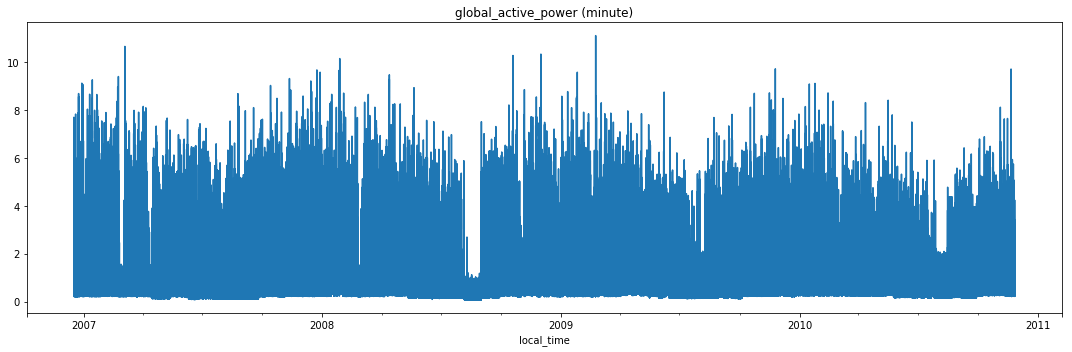

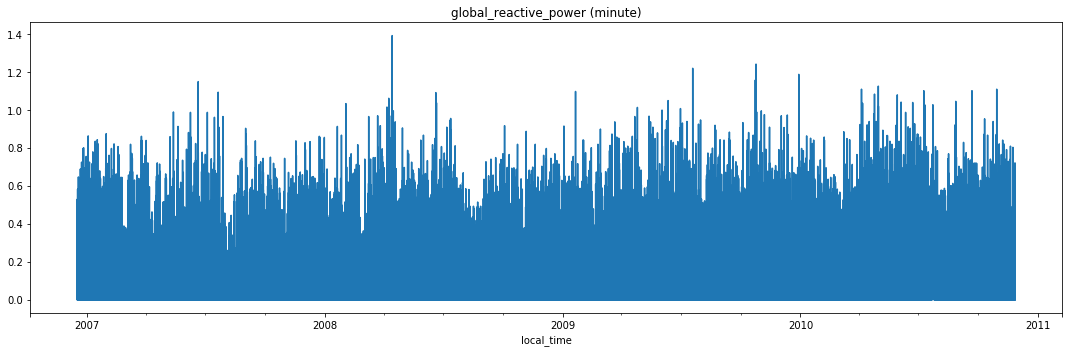

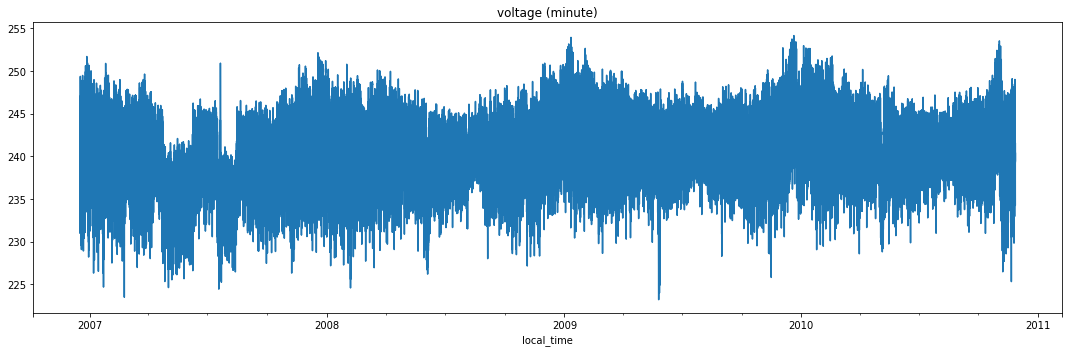

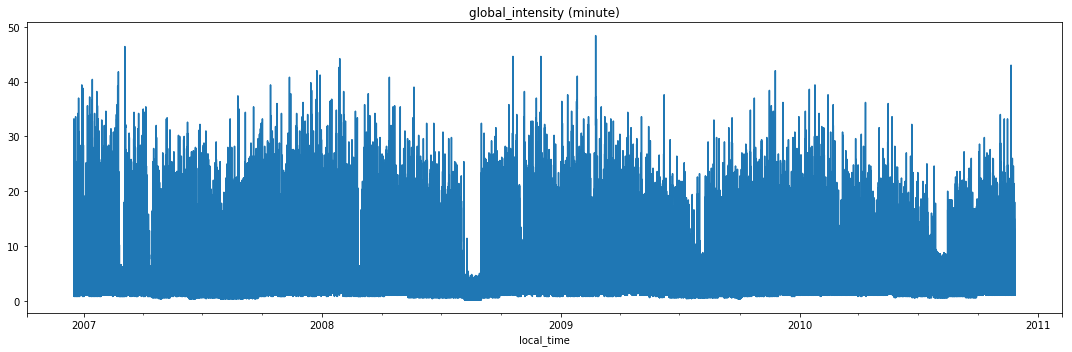

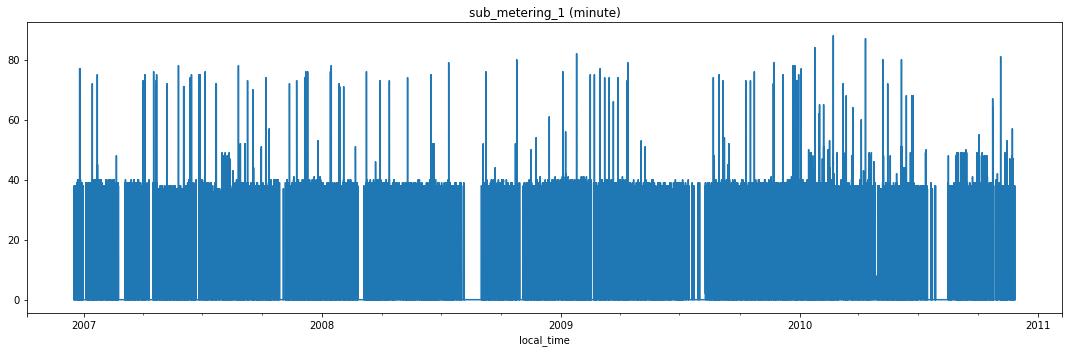

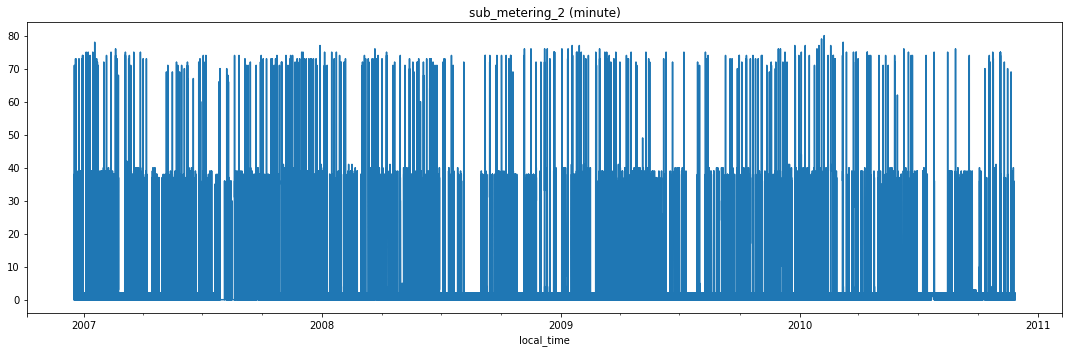

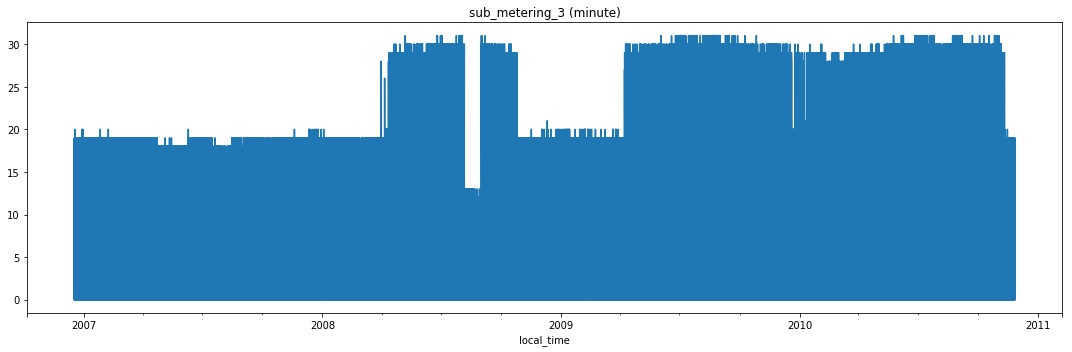

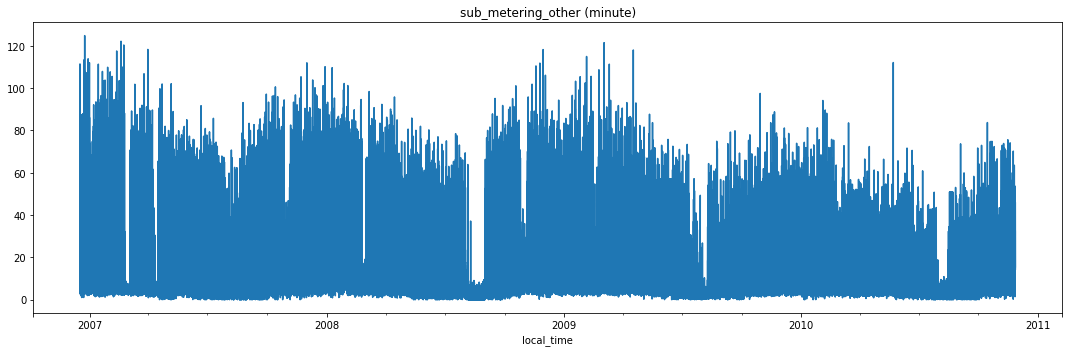

In [36]:
for col in cols:
    df[col].plot(title=col + " (minute)", figsize=(15,5)) 
    plt.tight_layout()
    plt.savefig("./plots/" + "minutely_" + col + ".png")
    plt.show()

### Hourly Plots

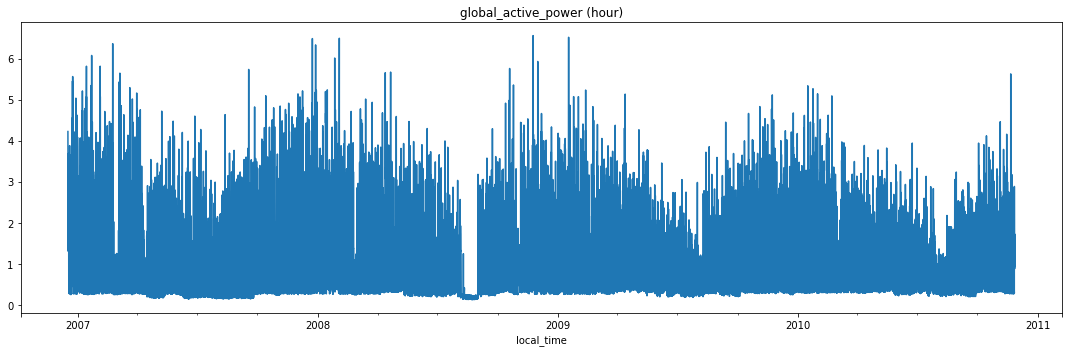

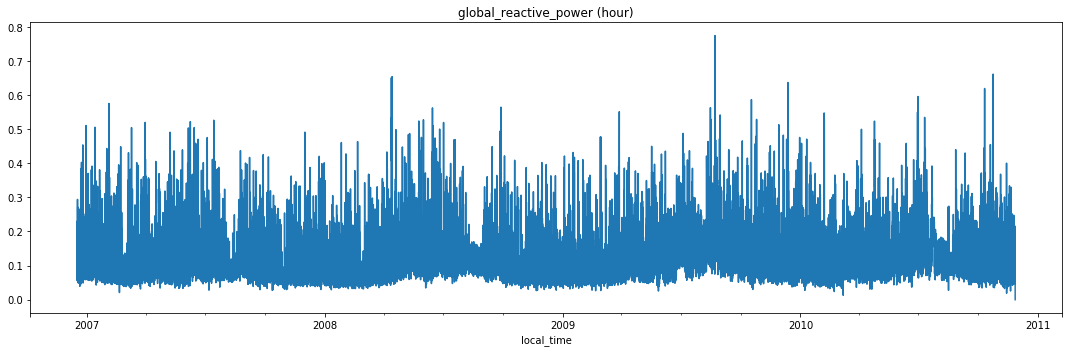

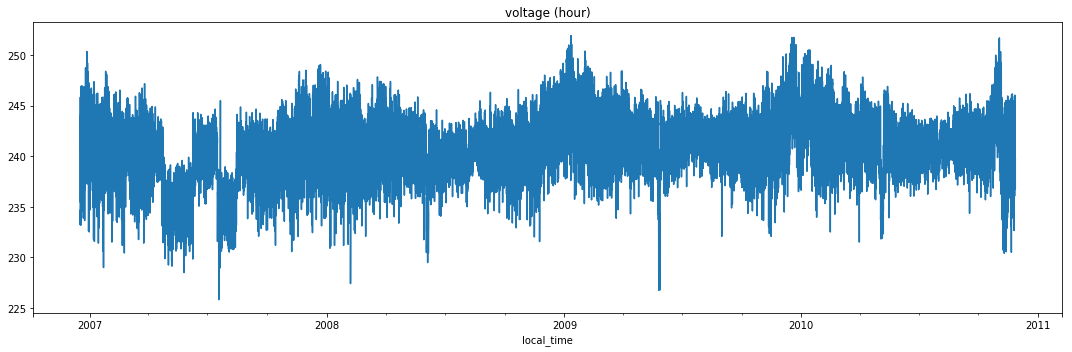

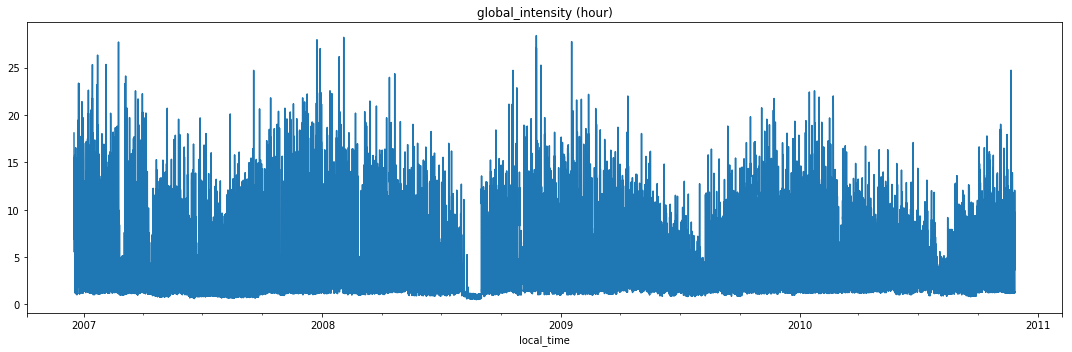

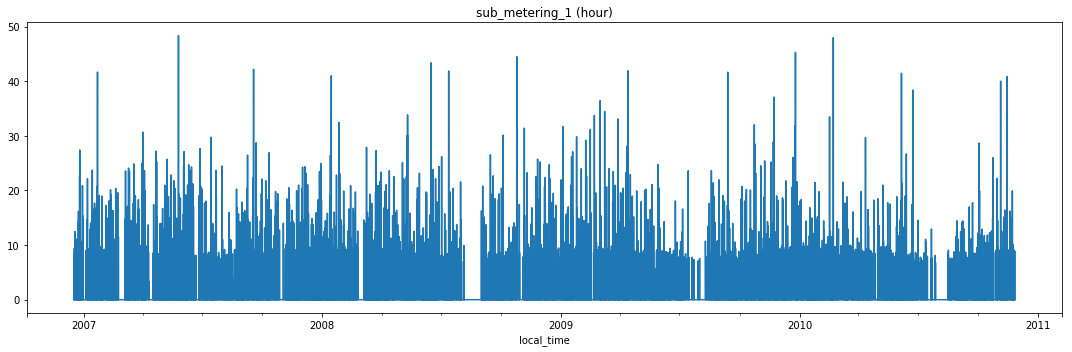

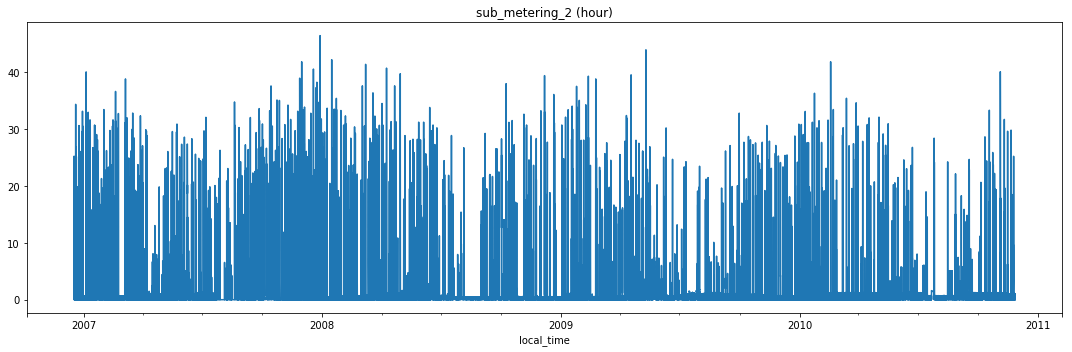

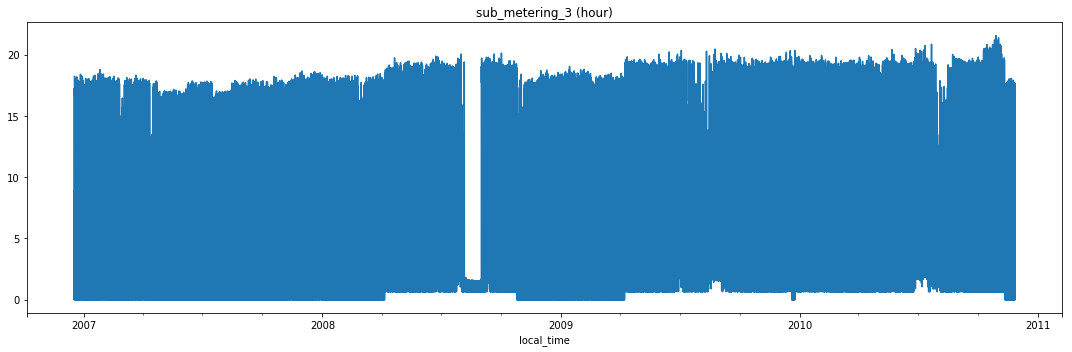

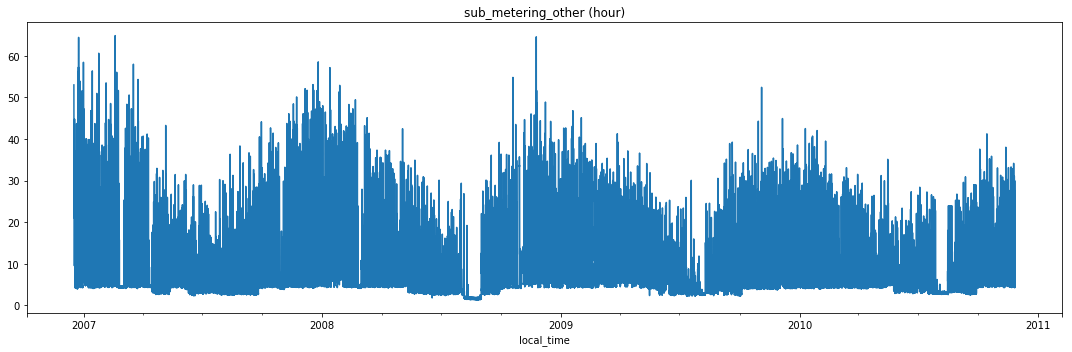

In [37]:
# hourly plots
for col in cols:
    df[col].resample("H").mean().plot(title=col + " (hour)", figsize=(15,5))
    plt.tight_layout()
    plt.savefig("./plots/" + "hourly_" + col + ".png")
    plt.show()

### Daily Plots for different parameters

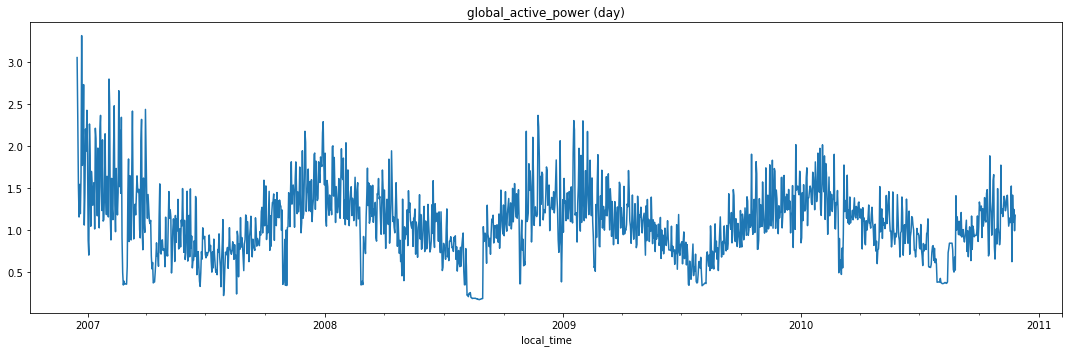

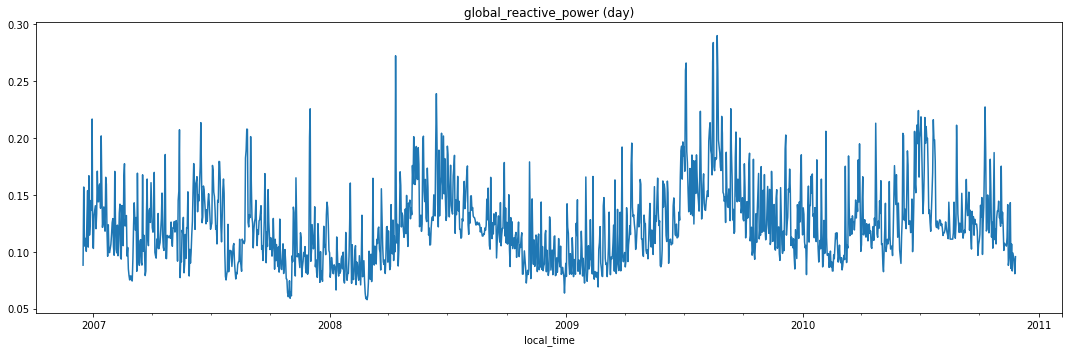

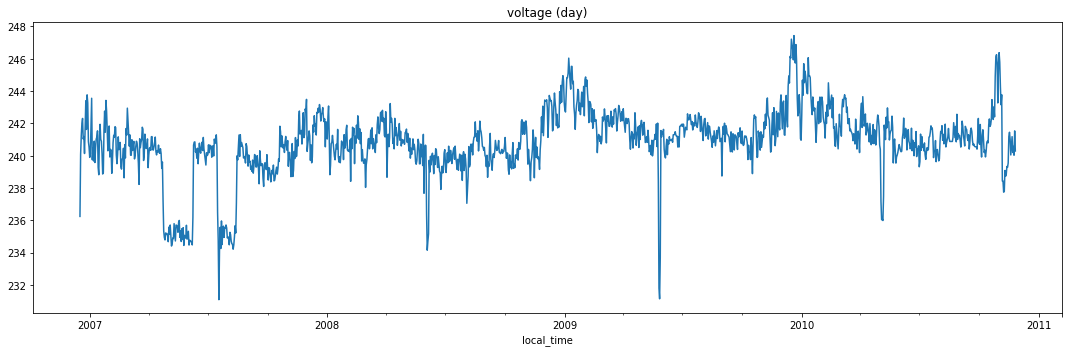

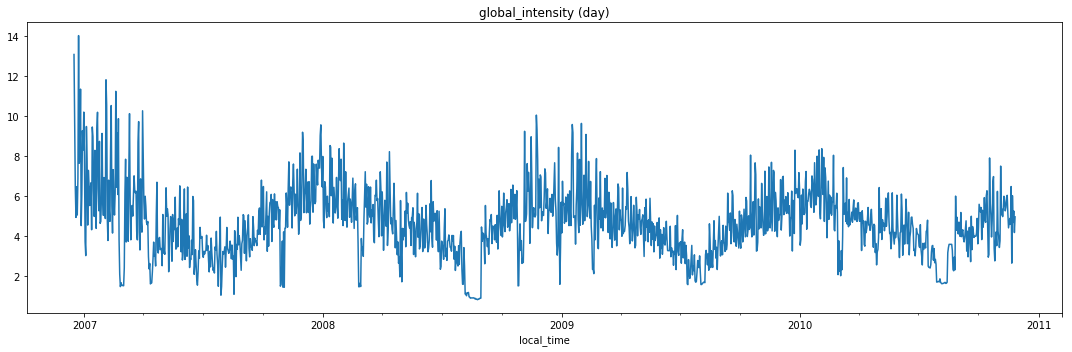

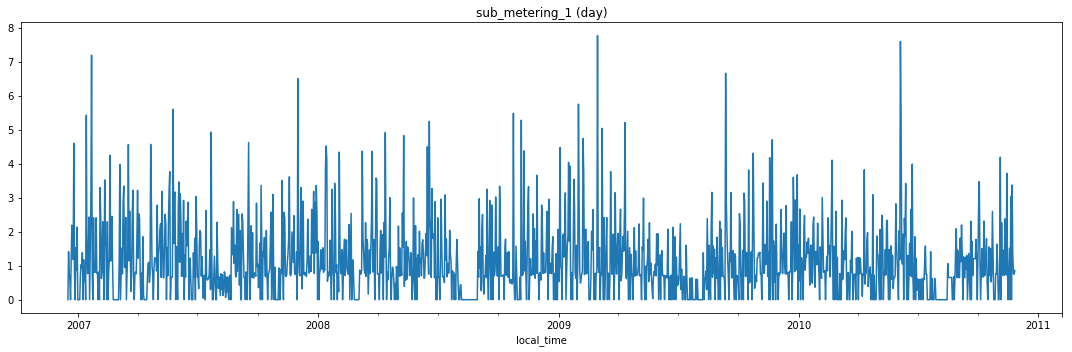

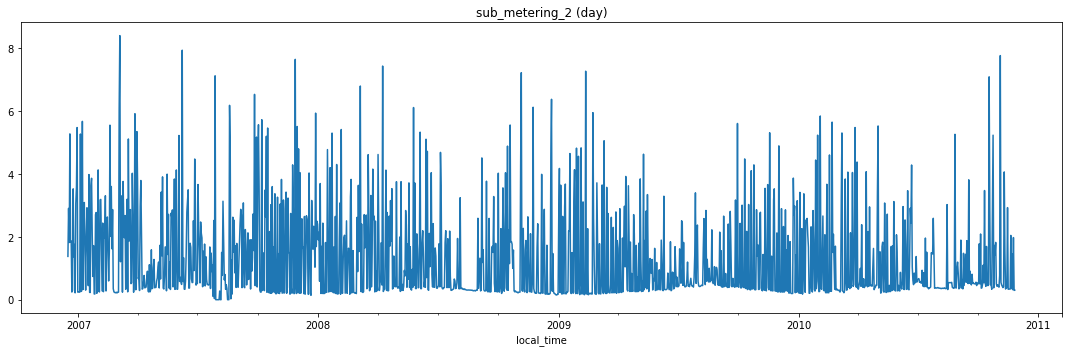

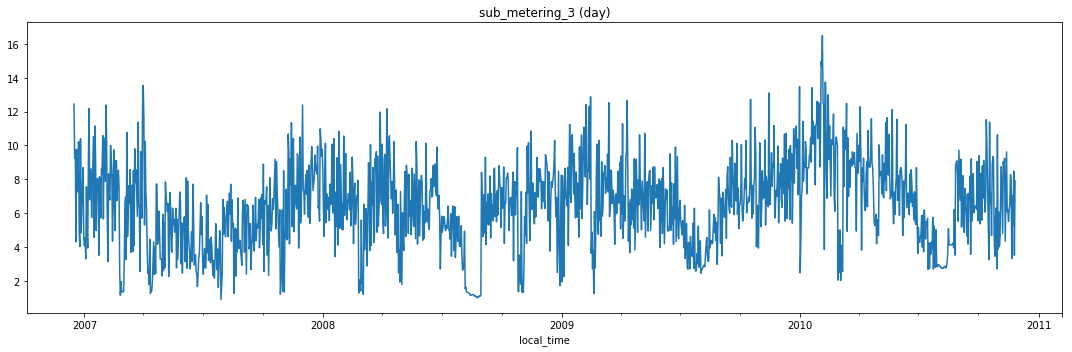

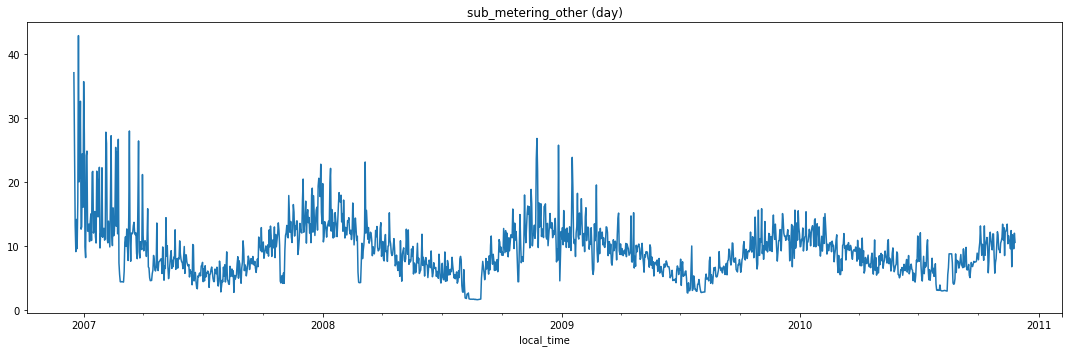

In [38]:
# Daily plots
for col in cols:
    df[col].resample("D").mean().plot(title=col + " (day)", figsize=(15,5))
    plt.tight_layout()
    plt.savefig("./plots/" + "daily_" + col + ".png")
    plt.show()

### Weekly Plots

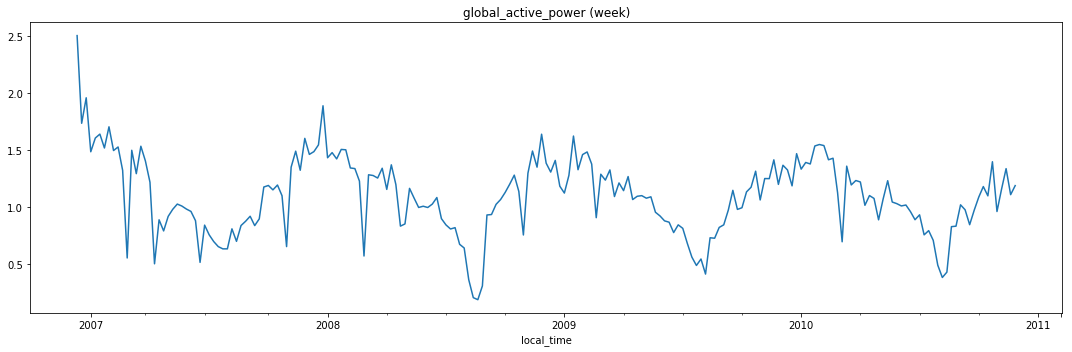

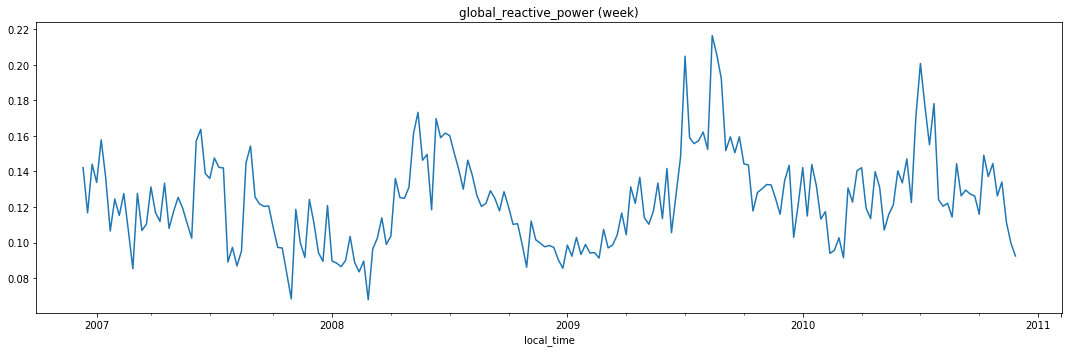

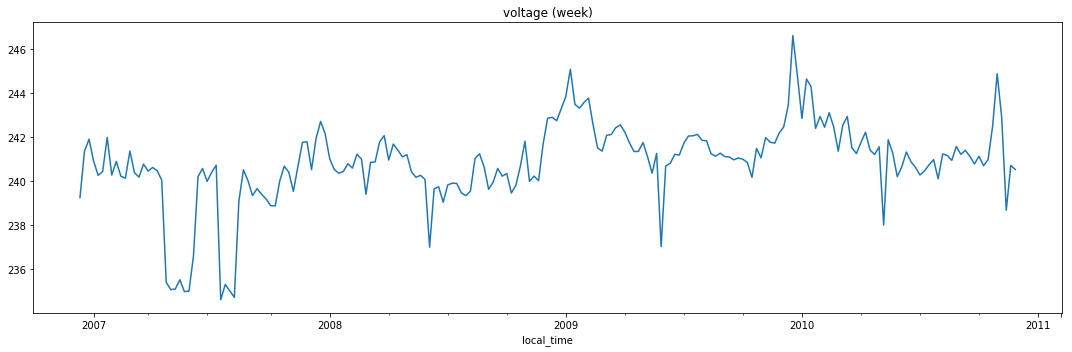

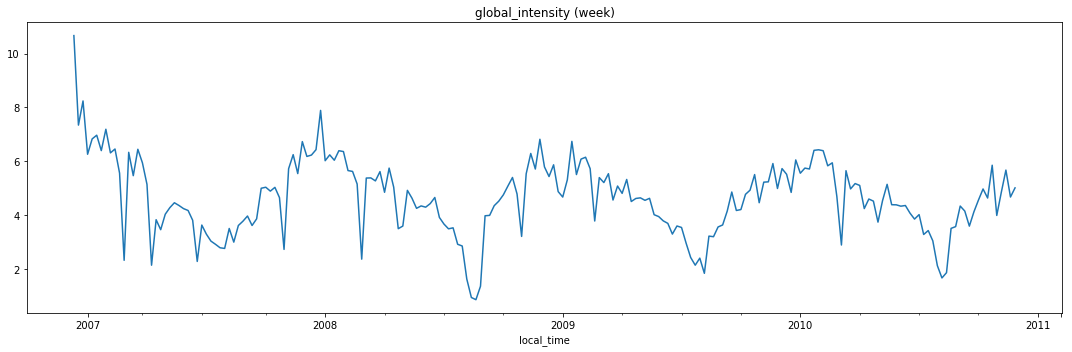

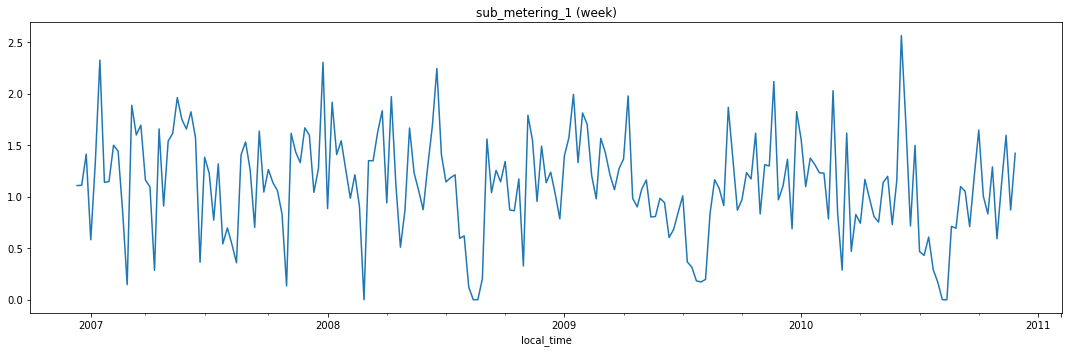

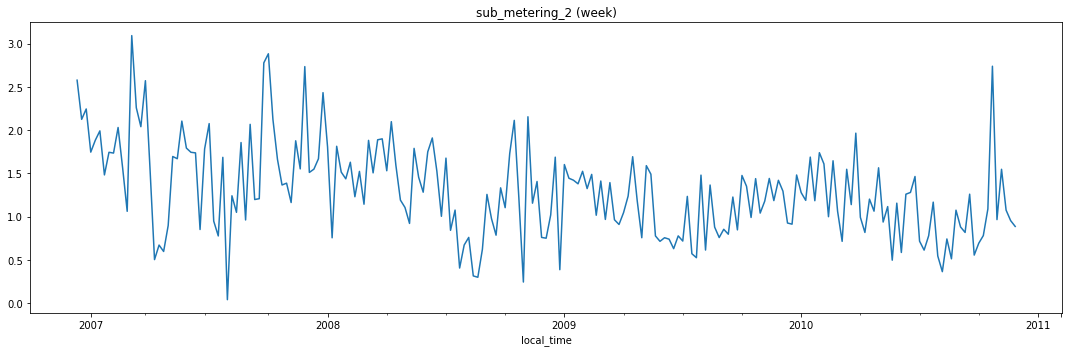

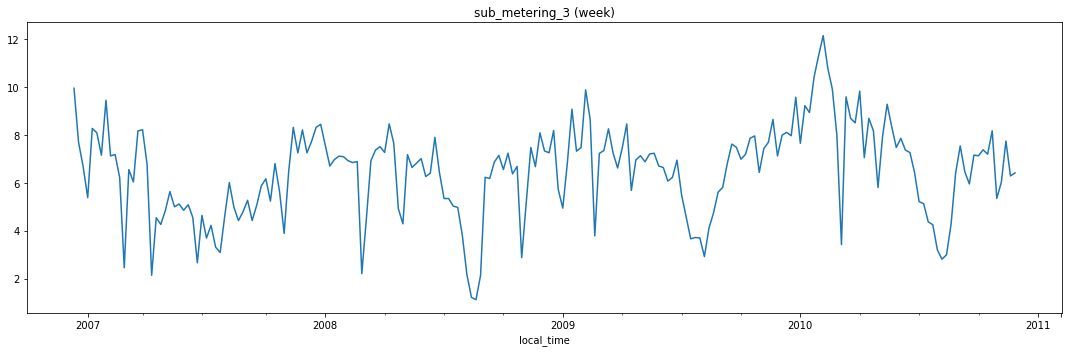

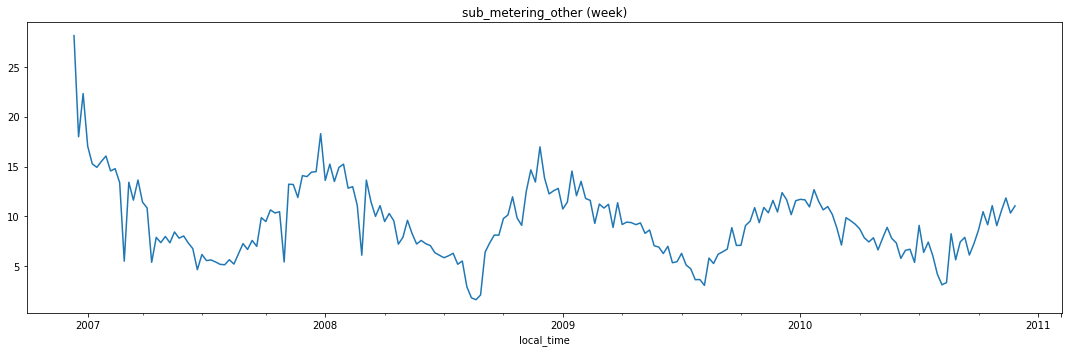

In [39]:
for col in cols:
    df[col].resample("W").mean().plot(title=col + " (week)", figsize=(15,5)) 
    plt.tight_layout()
    plt.savefig("./plots/" + "weekly_" + col + ".png")
    plt.show()

### Monthly Plots for different parameters

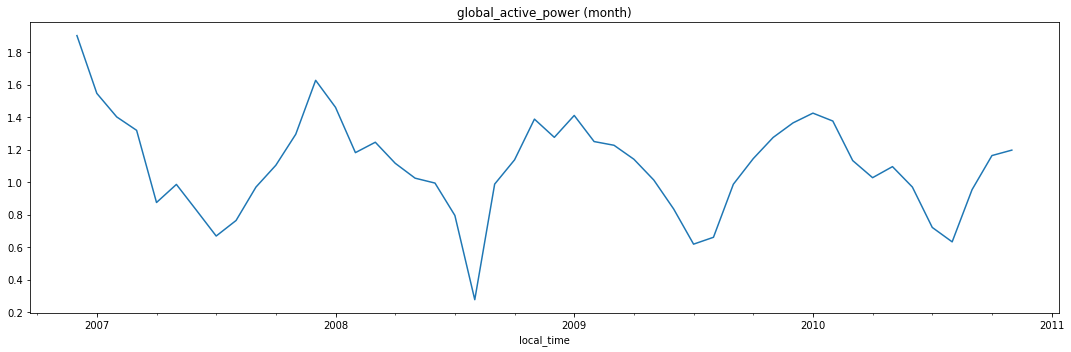

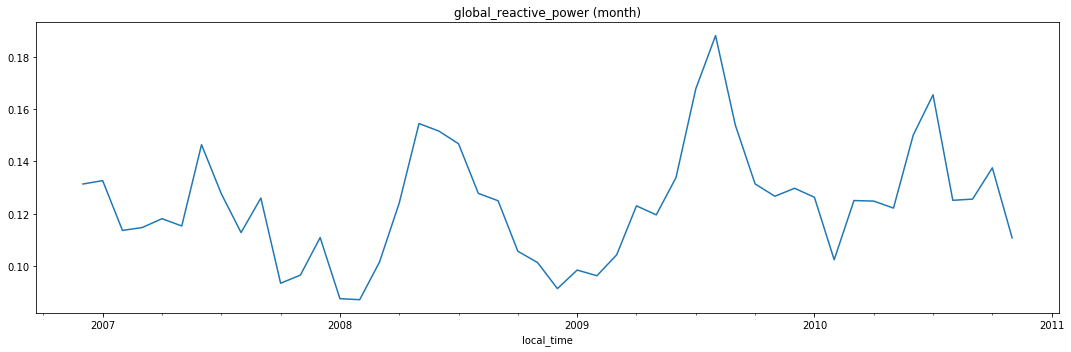

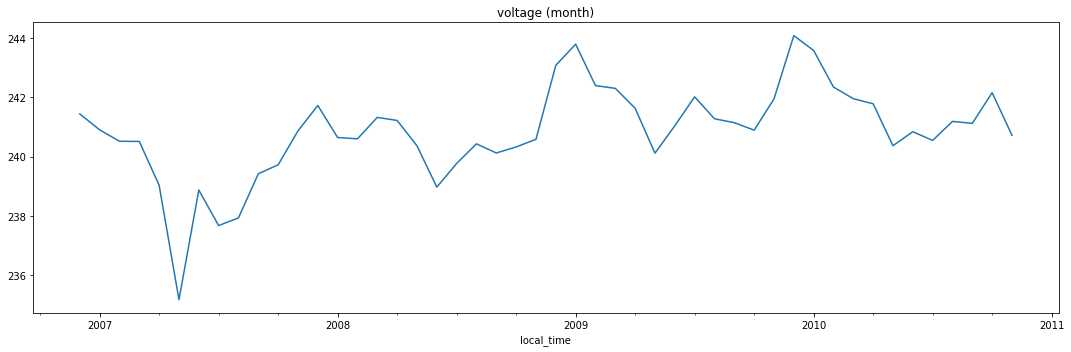

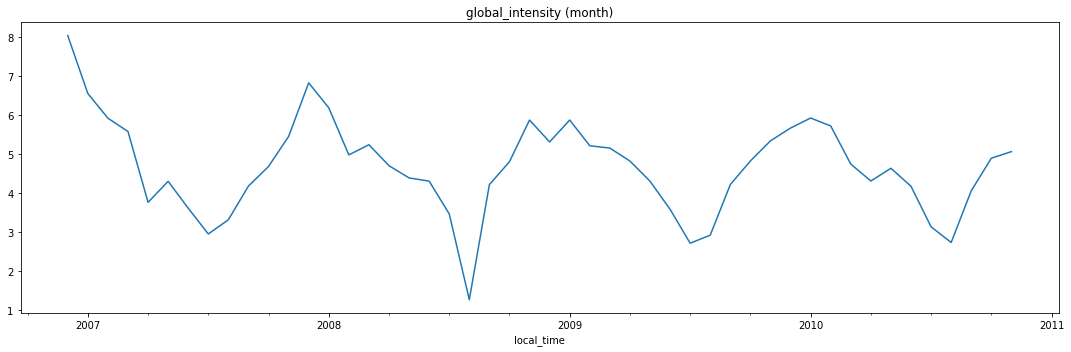

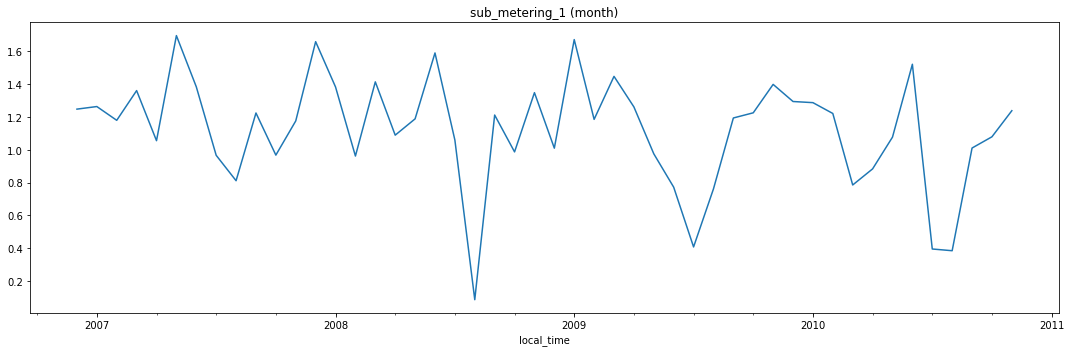

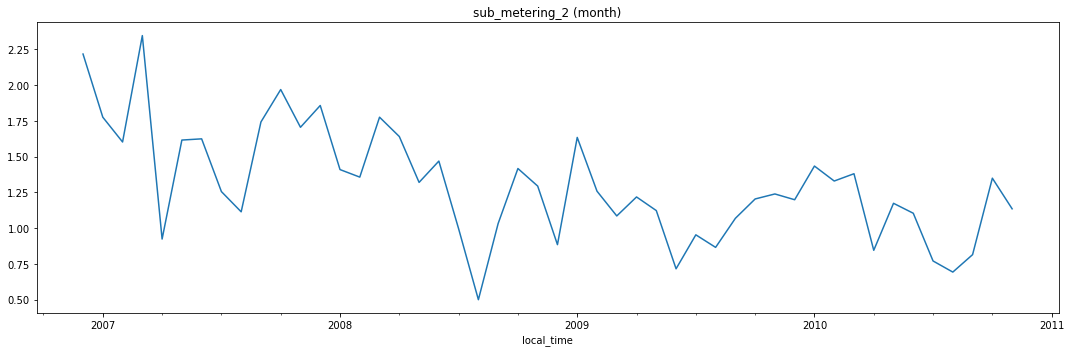

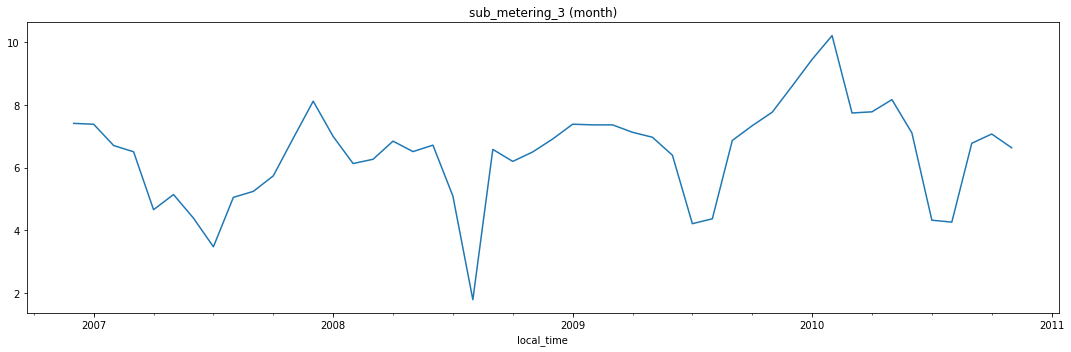

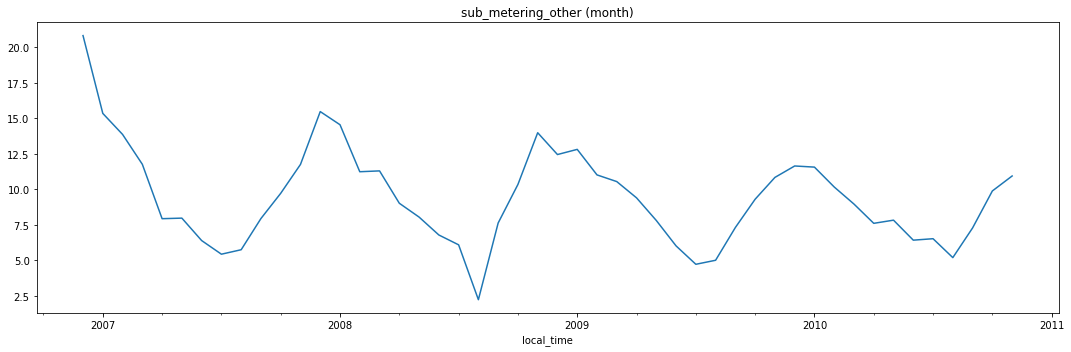

In [40]:
# For better view lets look at Monthly plots
for col in cols:
    df[col].resample("M").mean().plot(title=col + " (month)", figsize=(15,5)) 
    plt.tight_layout()
    plt.savefig("./plots/" + "monthly_" + col + ".png")
    plt.show()

### Yearwise boxplots with respect to weekday/weekends, months, quarter

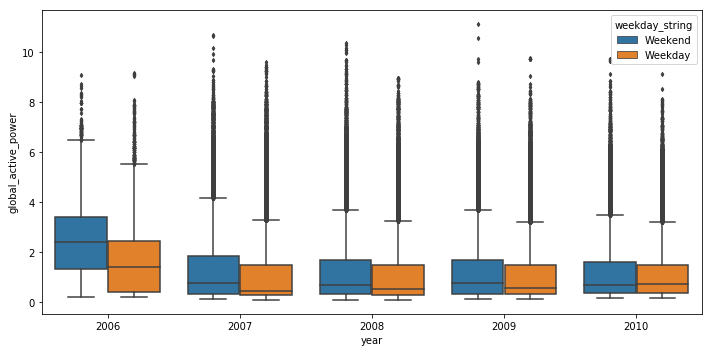

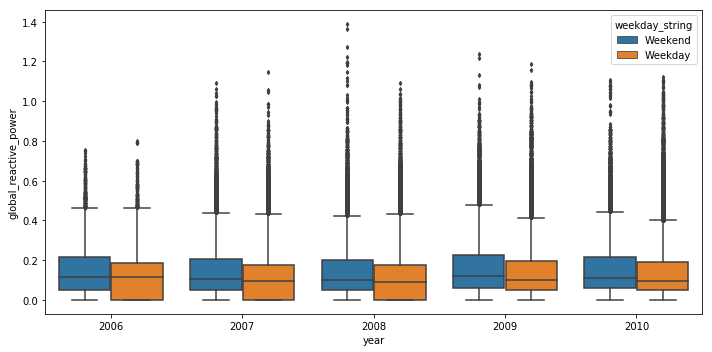

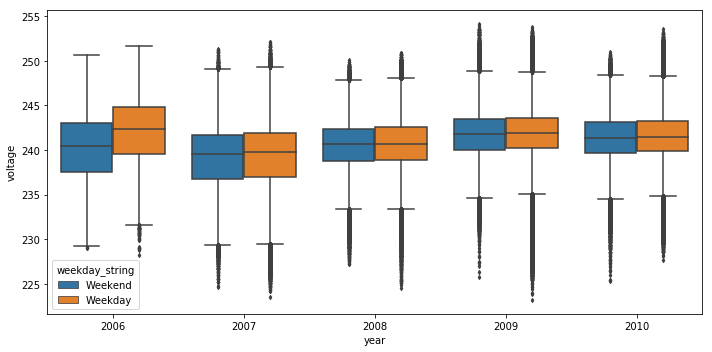

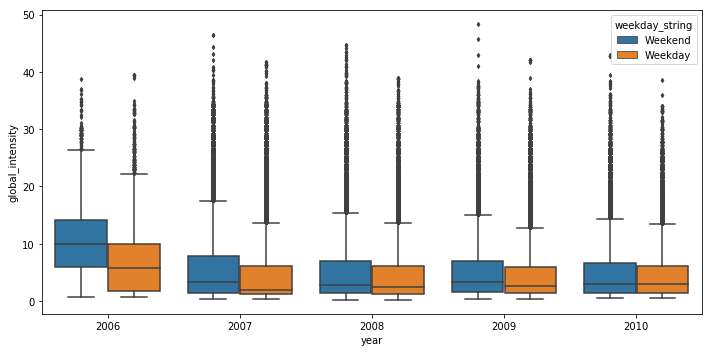

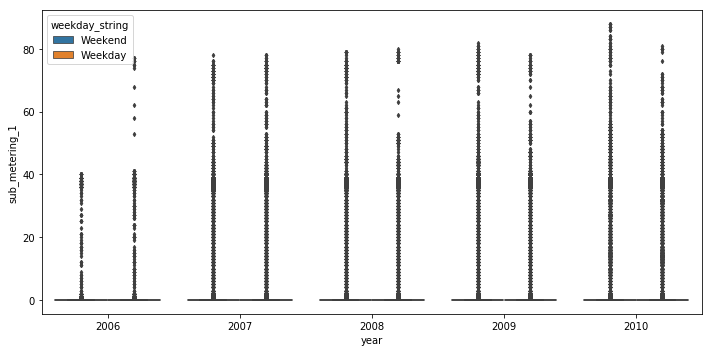

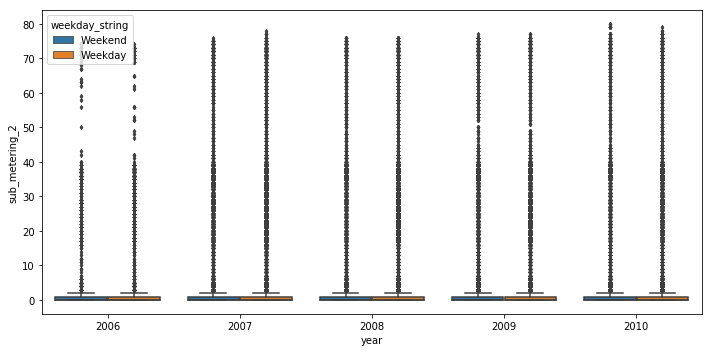

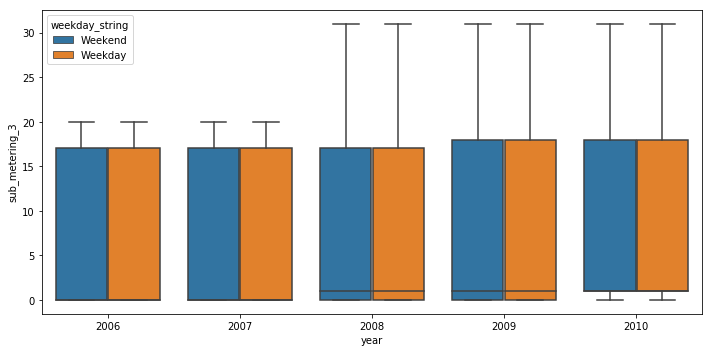

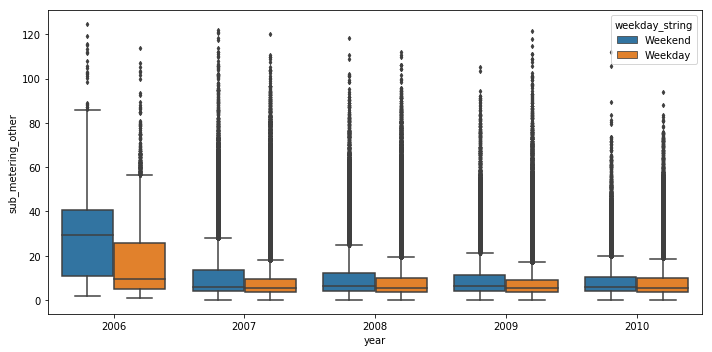

In [41]:
dic={0: "Weekend", 1: "Weekday"}

df["weekday_string"] = df.weekday.map(dic)
for col in cols:
    plt.figure(figsize=(10,5))
    sns.boxplot("year", col, hue="weekday_string", data=df, width=0.8, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "box_weekday_" + col + ".png")
    plt.show()

### 2016 has less data, show medians are going high (Only december months data)

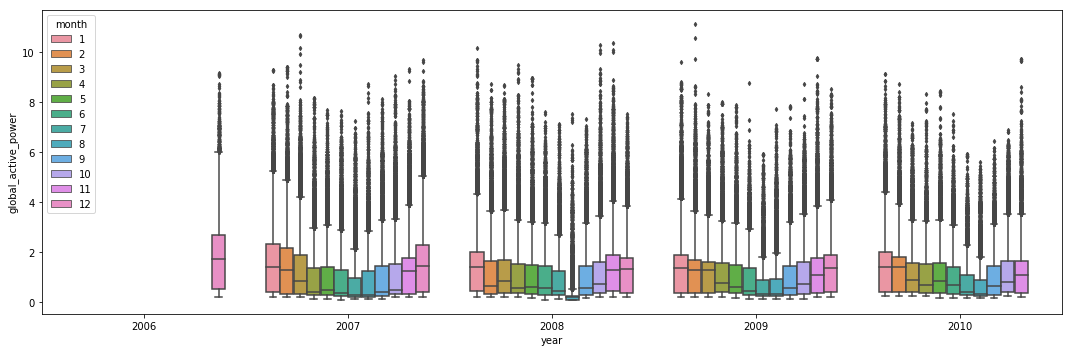

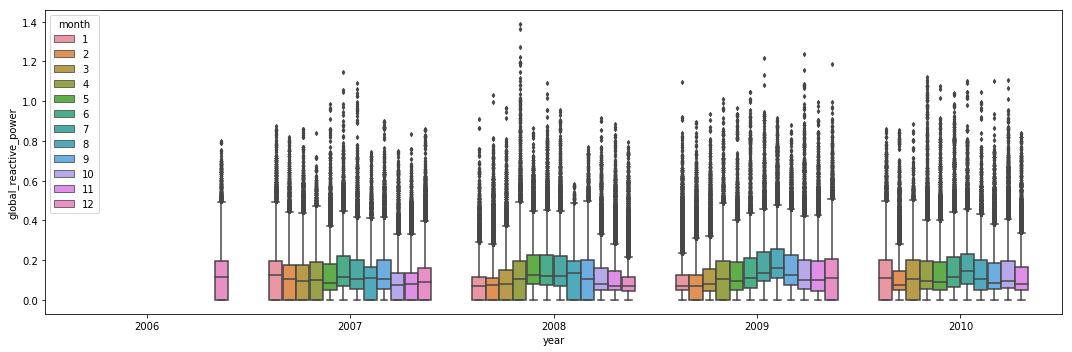

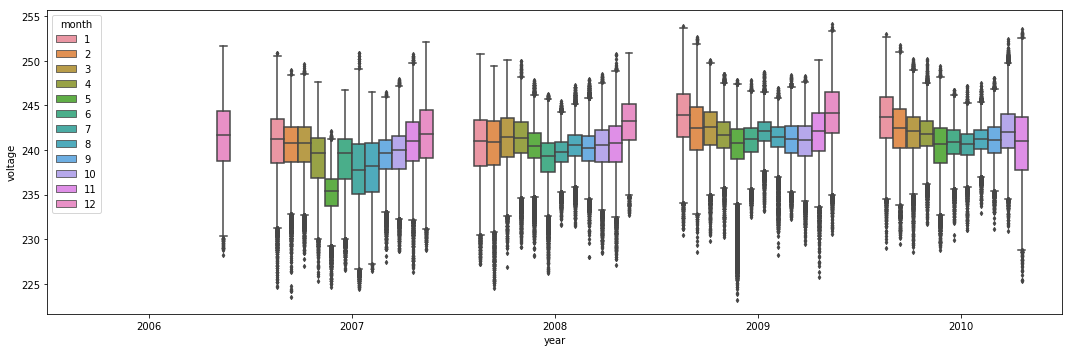

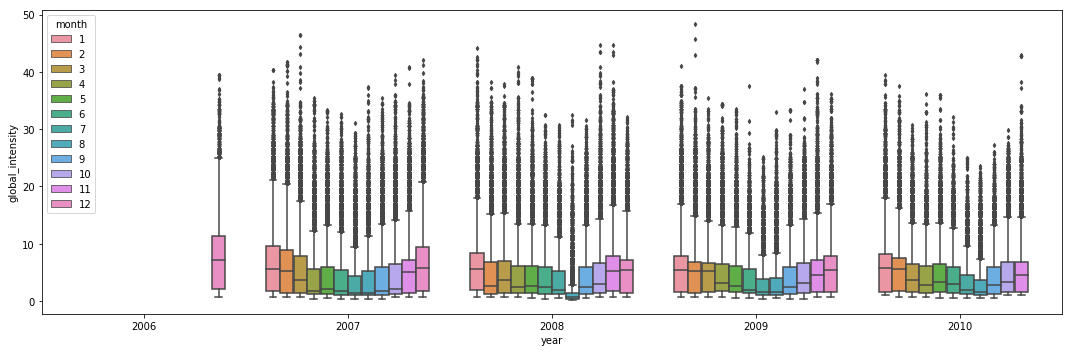

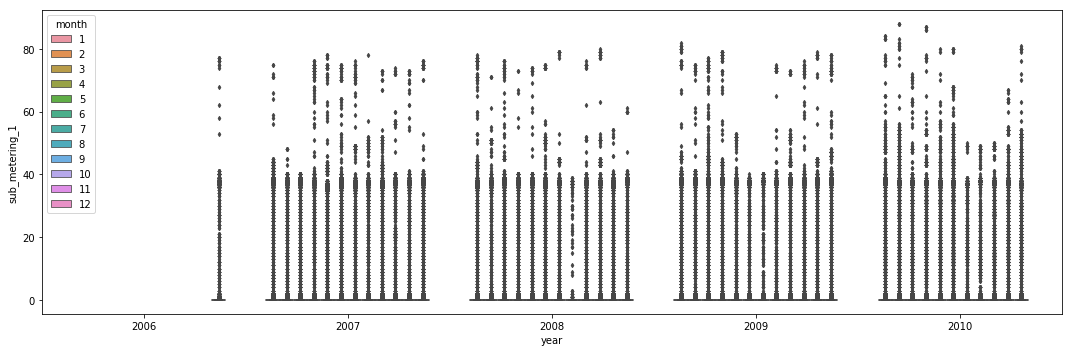

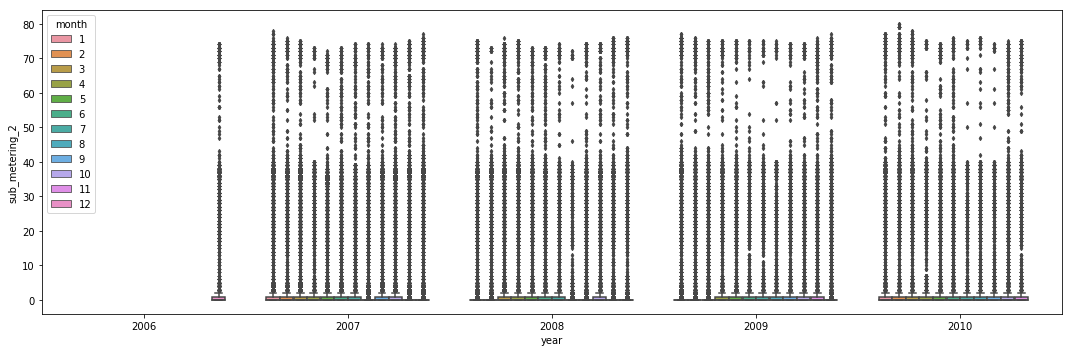

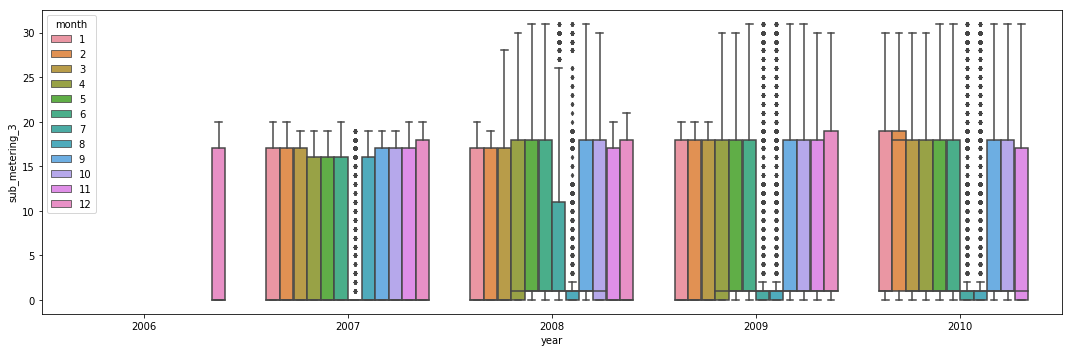

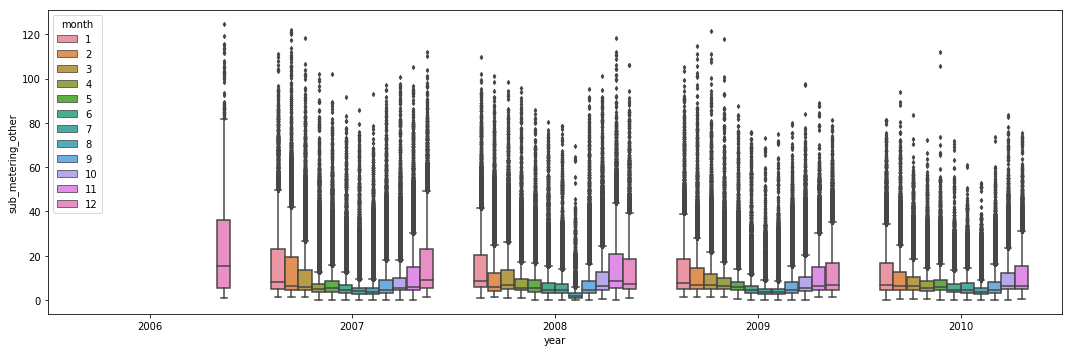

In [42]:
for col in cols:
    plt.figure(figsize=(15,5))
    sns.boxplot("year", col, hue="month", data=df, width=0.8, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "box_month_" + col + ".png")
    plt.show()

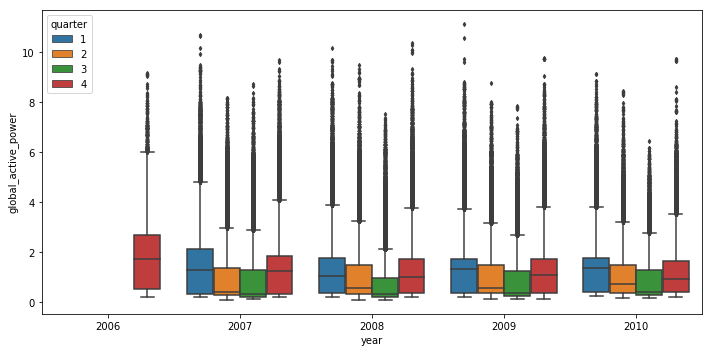

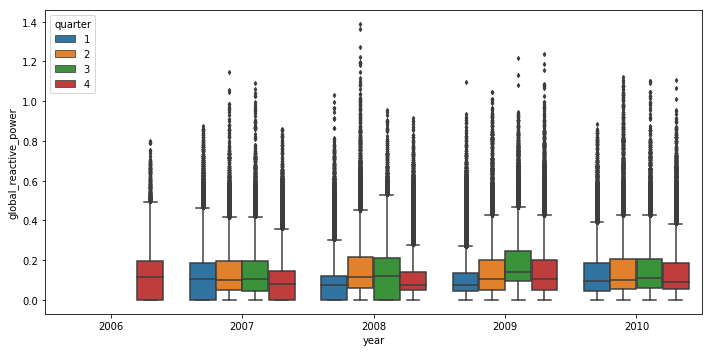

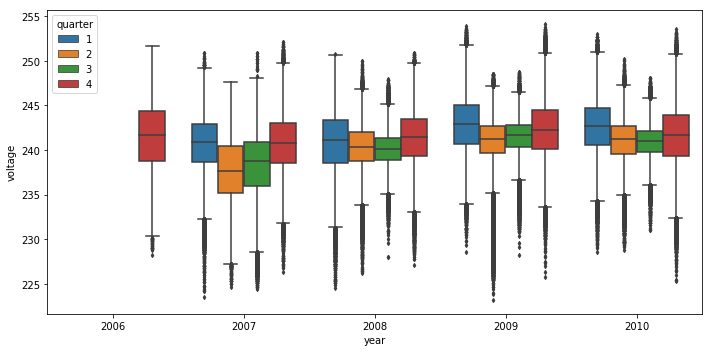

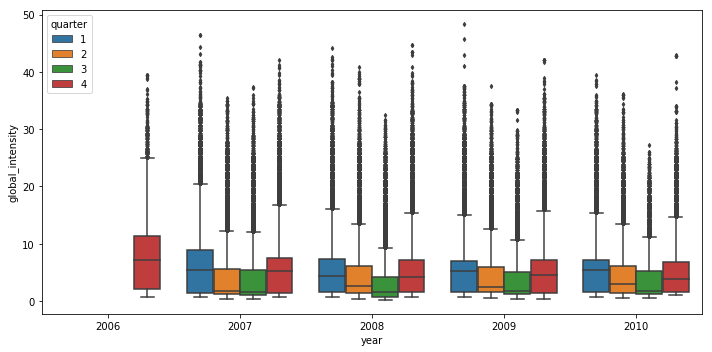

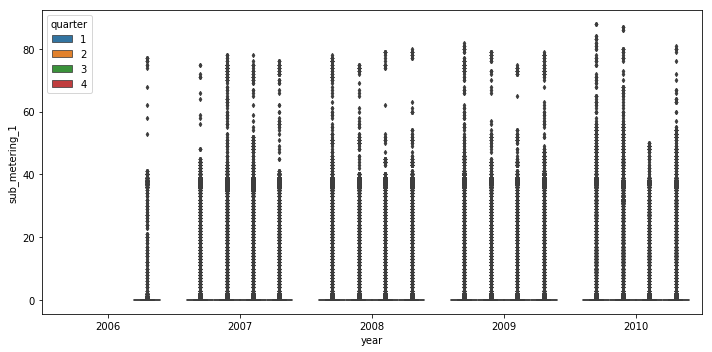

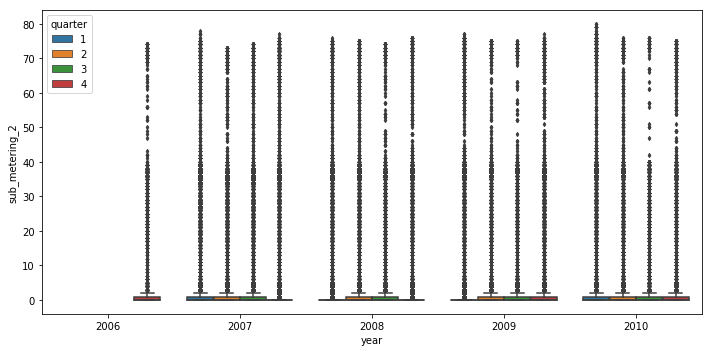

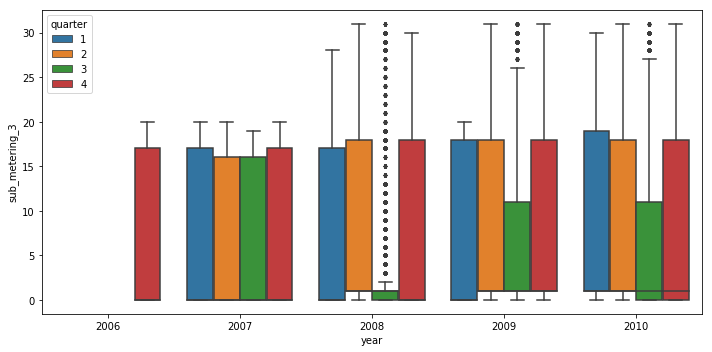

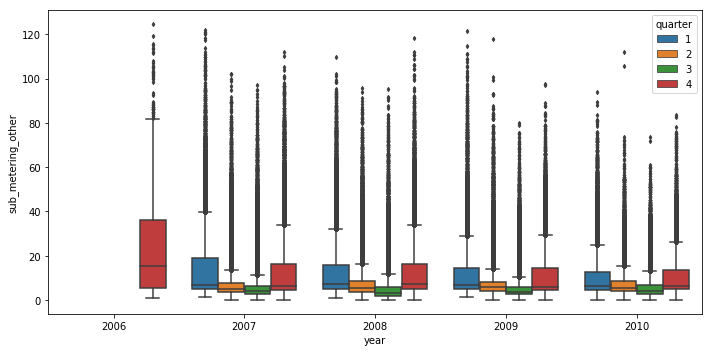

In [43]:
for col in cols:
    plt.figure(figsize=(10,5))
    sns.boxplot("year", col, hue="quarter", data=df, width=0.8, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "box_quarter_" + col + ".png")
    plt.show()

### Quarter 1 & 3 showing interesting results, as well as it is notable to see the consumption box plots. Submeter 3 is for water heater and air conditioner. We can make intuitions from that.

## Factor plots to see the trend over year

<Figure size 720x360 with 0 Axes>

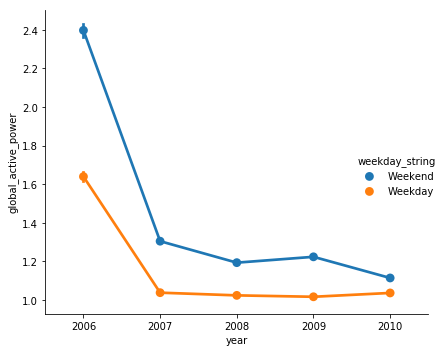

<Figure size 720x360 with 0 Axes>

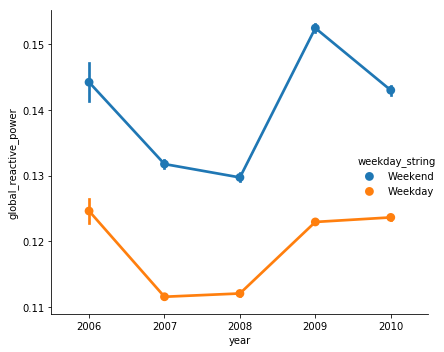

<Figure size 720x360 with 0 Axes>

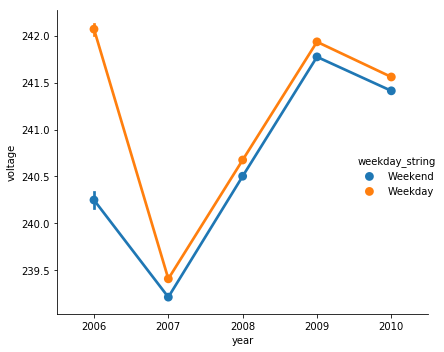

<Figure size 720x360 with 0 Axes>

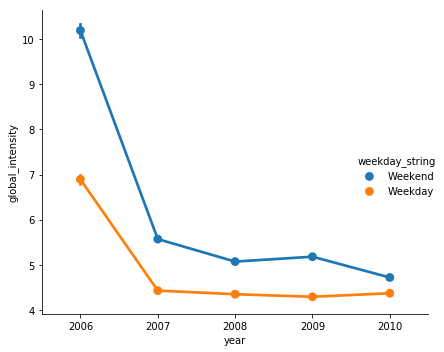

<Figure size 720x360 with 0 Axes>

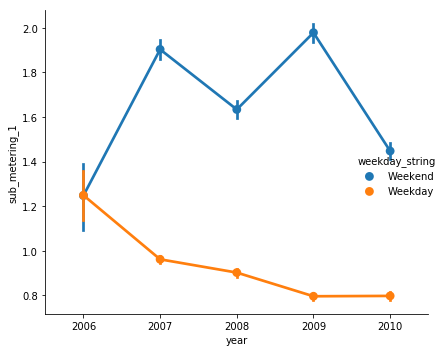

<Figure size 720x360 with 0 Axes>

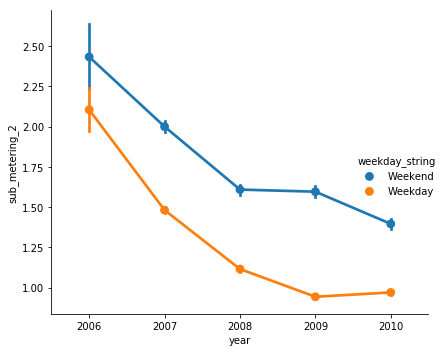

<Figure size 720x360 with 0 Axes>

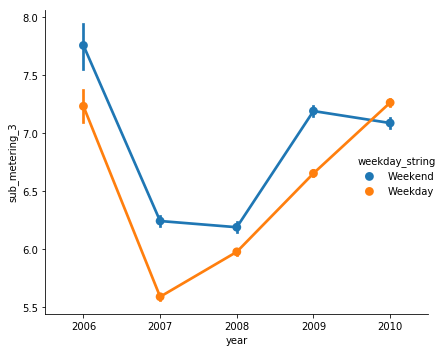

<Figure size 720x360 with 0 Axes>

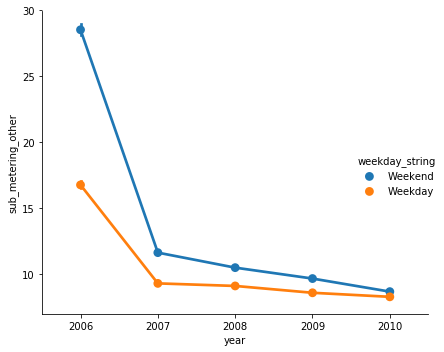

In [44]:
for col in cols:
    plt.figure(figsize=(10,5))
    sns.factorplot("year", col, hue="weekday_string", data=df, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "factor_weekday_" + col + ".png")
    plt.show()

<Figure size 720x360 with 0 Axes>

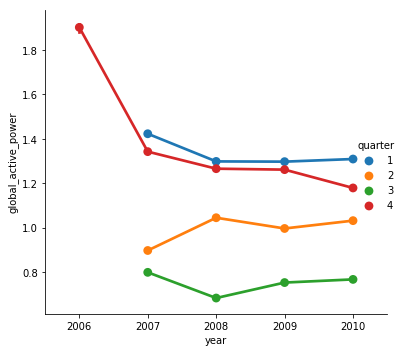

<Figure size 720x360 with 0 Axes>

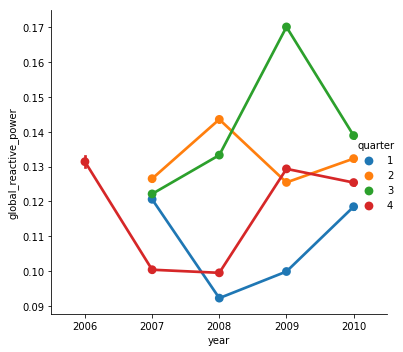

<Figure size 720x360 with 0 Axes>

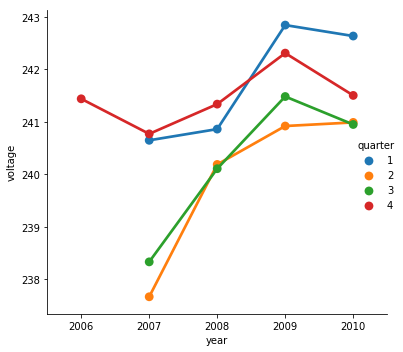

<Figure size 720x360 with 0 Axes>

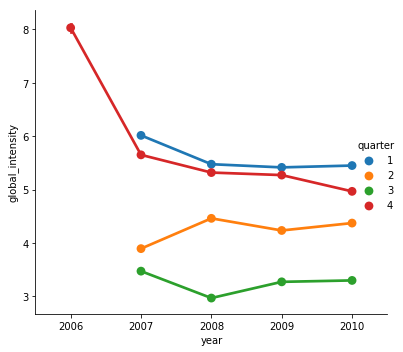

<Figure size 720x360 with 0 Axes>

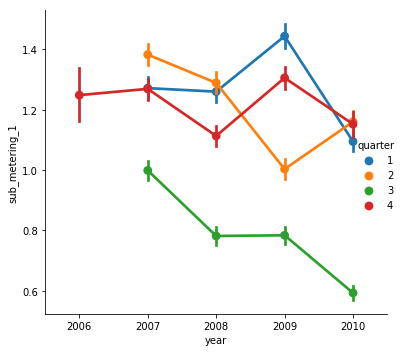

<Figure size 720x360 with 0 Axes>

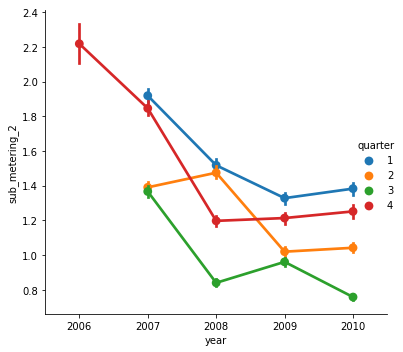

<Figure size 720x360 with 0 Axes>

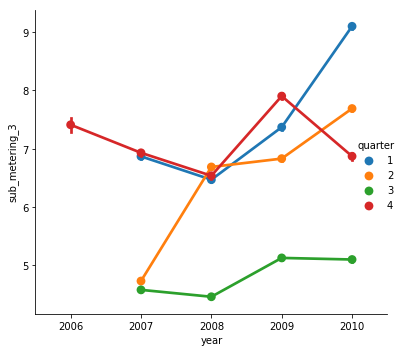

<Figure size 720x360 with 0 Axes>

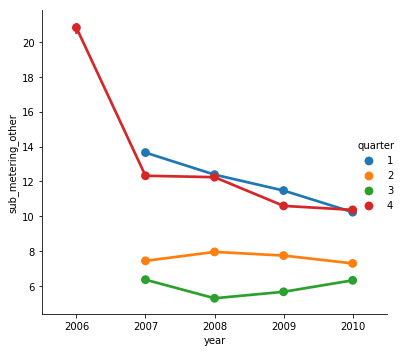

In [45]:
for col in cols:
    plt.figure(figsize=(10,5))
    sns.factorplot("year", col, hue="quarter", data=df, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "factor_quarter_" + col + ".png")
    plt.show()

<Figure size 720x360 with 0 Axes>

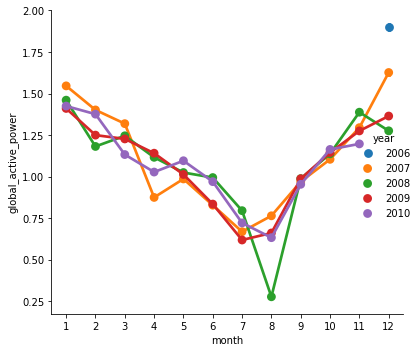

<Figure size 720x360 with 0 Axes>

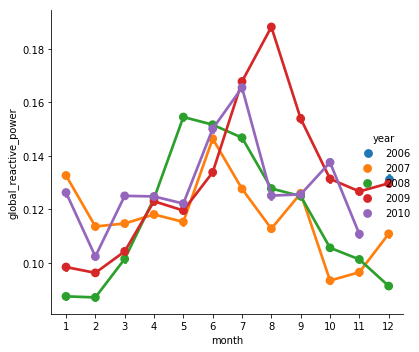

<Figure size 720x360 with 0 Axes>

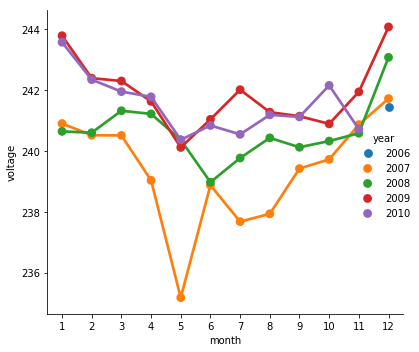

<Figure size 720x360 with 0 Axes>

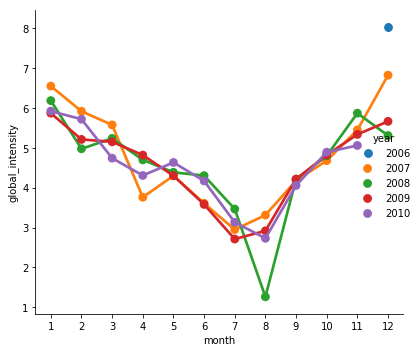

<Figure size 720x360 with 0 Axes>

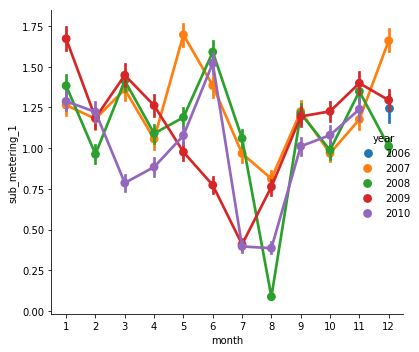

<Figure size 720x360 with 0 Axes>

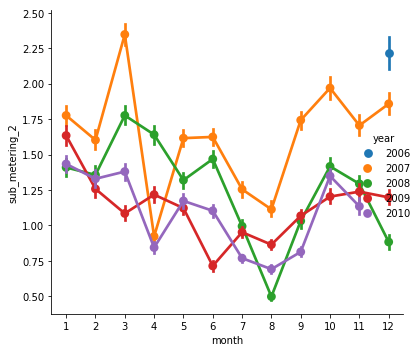

<Figure size 720x360 with 0 Axes>

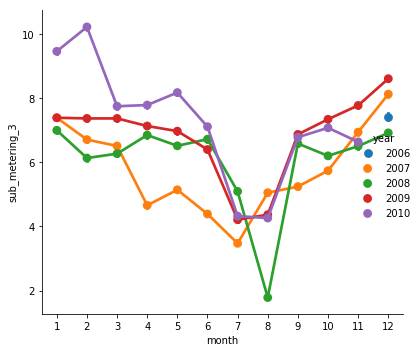

<Figure size 720x360 with 0 Axes>

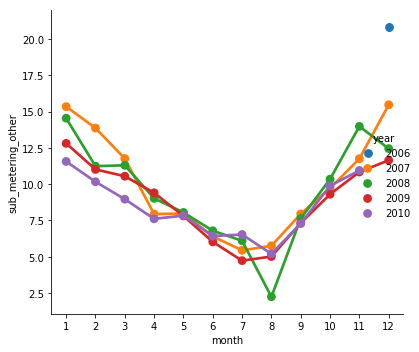

In [46]:
for col in cols:
    plt.figure(figsize=(10,5))
    sns.factorplot("month", col, hue="year", data=df, fliersize=3)
    plt.tight_layout()
    plt.savefig("./plots/" + "factor_month_year_" + col + ".png")
    plt.show()

### Let's check correlation among data

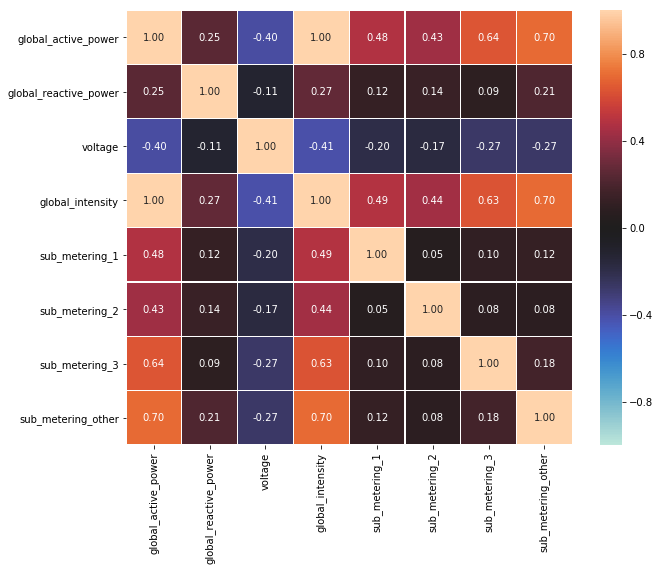

In [47]:
# minute wise data points
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr(method="pearson"), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", linewidths=0.2);
plt.savefig("./plots/corr_heatmap_minute.png")

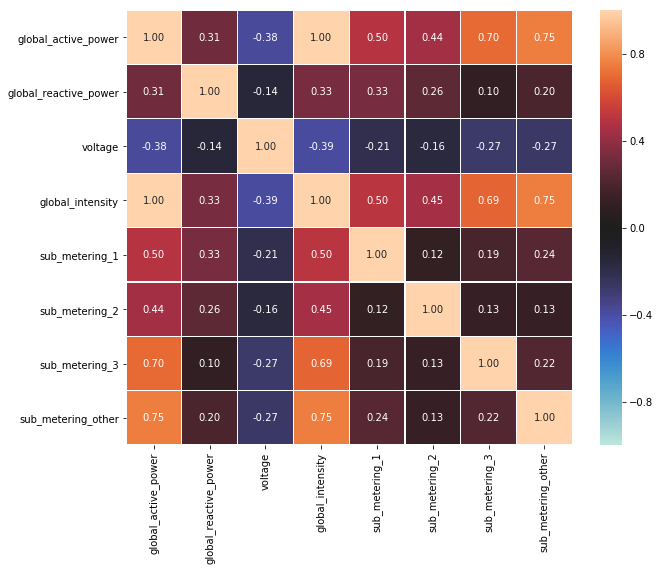

In [48]:
# hour wise data points
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].resample("H").mean().corr(method="pearson"), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", linewidths=0.2);
plt.savefig("./plots/corr_heatmap_hour.png")

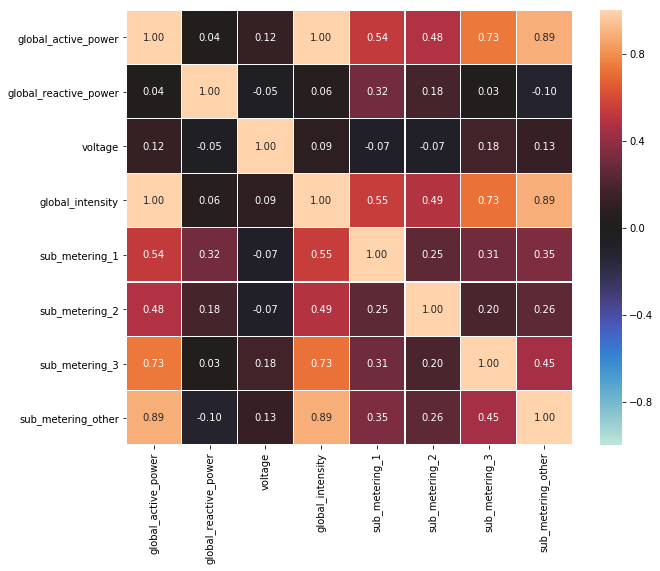

In [49]:
# day wise data points
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].resample("D").mean().corr(method="pearson"), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", linewidths=0.2);
plt.savefig("./plots/corr_heatmap_day.png")

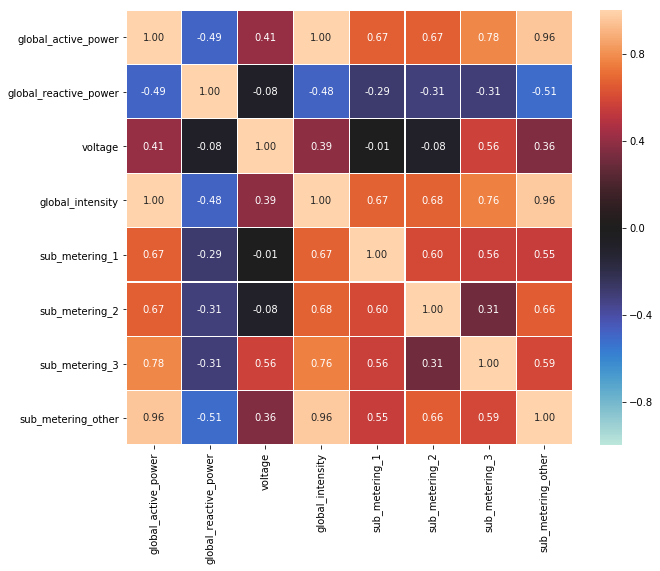

In [50]:
# month wise data points
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].resample("M").mean().corr(method="pearson"), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", linewidths=0.2);
plt.savefig("./plots/corr_heatmap_day.png")